In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/content/Energy.csv')

Predict the Energy Star Score

In [3]:
pd.set_option('display.max_columns',None)
df.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2 Postal Code  \
0  201/205  East  42nd  st.            Not Available       10017   
1          622 168th Street            Not Available       10032   
2             3975 Broadway            Not Available       10032   
3   161 Fort Washington Ave  177 Fort Washington Ave       10032   
4     710 West 168th Street            Not Available       10032   

  Street Number           Street Name    Borough  DOF Gross Floor Area  \
0           675              3 AVENUE  Manhattan              289356.0   
1           180  FT WASHINGTON AVENUE  Manhattan             3693539.0   
2          3975              BROADWAY  Manhattan              152765.0   
3           161  FT WASHINGTON AVENUE  Manhattan              891040.0   
4           193  FT WASHINGTON AVENUE  Manhattan              211400.0   

   Primary Property Type - Self Selected  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   
2                                             231342   
3                                            1305748   
4                                             179694   

  2nd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   
3                 Not Available   
4                 Not Available   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                     Not Available   
1                                     Not Available   
2                                     Not Available   
3                                     Not Available   
4                    

In [4]:
df.shape

(11746, 60)

In [5]:
df.isnull().sum().sort_values(ascending=False)

NTA                                                           2263
Longitude                                                     2263
Census Tract                                                  2263
Council District                                              2263
Community Board                                               2263
Latitude                                                      2263
Street Number                                                  124
Street Name                                                    122
Water Required?                                                118
Borough                                                        118
DOF Gross Floor Area                                           118
DOF Benchmarking Submission Status                              30
BBL - 10 digits                                                 11
Fuel Oil #2 Use (kBtu)                                           0
Weather Normalized Site Electricity (kWh)                     

In [6]:
# dropping irrelevant columns to me
df.drop(['Order','Property Id','Property Name','Parent Property Id','BBL - 10 digits','NYC Borough, Block and Lot (BBL) self-reported','NYC Building Identification Number (BIN)','Street Number','Street Name','NTA'],axis=1,inplace=True)

In [7]:
#same
df.drop(['Address 2','Postal Code'],axis=1,inplace=True)

In [8]:
df.replace({'Not Available': np.nan},inplace=True)

In [9]:
df.isnull().sum().sort_values(ascending=False)

Fuel Oil #1 Use (kBtu)                                        11737
Diesel #2 Use (kBtu)                                          11730
Fuel Oil #5 & 6 Use (kBtu)                                    11152
District Steam Use (kBtu)                                     10810
Fuel Oil #4 Use (kBtu)                                        10425
3rd Largest Property Use Type - Gross Floor Area (ft²)        10262
3rd Largest Property Use Type                                 10262
Fuel Oil #2 Use (kBtu)                                         9165
2nd Largest Property Use - Gross Floor Area (ft²)              8005
2nd Largest Property Use Type                                  8005
Metered Areas  (Water)                                         4609
Water Use (All Water Sources) (kgal)                           3984
Water Intensity (All Water Sources) (gal/ft²)                  3984
Latitude                                                       2263
Longitude                                       

In [10]:
df.isnull().mean().sort_values(ascending=False)

Fuel Oil #1 Use (kBtu)                                        0.999234
Diesel #2 Use (kBtu)                                          0.998638
Fuel Oil #5 & 6 Use (kBtu)                                    0.949430
District Steam Use (kBtu)                                     0.920313
Fuel Oil #4 Use (kBtu)                                        0.887536
3rd Largest Property Use Type - Gross Floor Area (ft²)        0.873659
3rd Largest Property Use Type                                 0.873659
Fuel Oil #2 Use (kBtu)                                        0.780266
2nd Largest Property Use - Gross Floor Area (ft²)             0.681509
2nd Largest Property Use Type                                 0.681509
Metered Areas  (Water)                                        0.392389
Water Use (All Water Sources) (kgal)                          0.339179
Water Intensity (All Water Sources) (gal/ft²)                 0.339179
Latitude                                                      0.192661
Longit

In [11]:
#dropping columns with over 50% missing values
drop_cols = []

for col in df.columns:
  if df[col].isnull().mean() > 0.5:
    drop_cols.append(col)

In [12]:
drop_cols

['2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'District Steam Use (kBtu)']

In [13]:
df = df.drop(columns = drop_cols)

In [14]:
df.head()

Parent Property Name Address 1 (self-reported)    Borough  \
0                     201/205  201/205  East  42nd  st.  Manhattan   
1  NYP Columbia (West Campus)          622 168th Street  Manhattan   
2  NYP Columbia (West Campus)             3975 Broadway  Manhattan   
3  NYP Columbia (West Campus)   161 Fort Washington Ave  Manhattan   
4  NYP Columbia (West Campus)     710 West 168th Street  Manhattan   

   DOF Gross Floor Area  Primary Property Type - Self Selected  \
0              289356.0                                 Office   
1             3693539.0  Hospital (General Medical & Surgical)   
2              152765.0  Hospital (General Medical & Surgical)   
3              891040.0  Hospital (General Medical & Surgical)   
4              211400.0  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
0                                             293447        1963   
1                                            3889181        1969   
2                                             231342        1924   
3                                            1305748        1971   
4                                             179694        1932   

   Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
0                                    2        100         Whole Building   
1                                   12        100         Whole Building   
2                                    1        100                    NaN   
3                                    1        100                    NaN   
4                                    1        100                    NaN   

  Metered Areas  (Water) ENERGY STAR Score Site EUI (kBtu/ft²)  \
0                    NaN               NaN               305.6   
1         Whole Building                55               229.8   
2                    NaN               NaN                 NaN   
3                    NaN               NaN                 NaN   
4                    NaN               NaN                 NaN   

  Weather Normalized Site EUI (kBtu/ft²)  \
0                                  303.1   
1                                  228.8   
2                                    NaN   
3                                    NaN   
4                                    NaN   

  Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                               37.8        
1                                               24.8        
2                                                NaN        
3                                                NaN        
4                                                NaN        

  Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                NaN           
1                                                2.4           
2                                                NaN           
3                                                NaN           
4                                                NaN           

  Weather Normalized Source EUI (kBtu/ft²) Natural Gas Use (kBtu)  \
0                                    614.2                    NaN   
1                                    401.1              933073441   
2                                      NaN                    NaN   
3                                      NaN                    NaN   
4           

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Parent Property Name                                        11746 non-null  object 
 1   Address 1 (self-reported)                                   11746 non-null  object 
 2   Borough                                                     11628 non-null  object 
 3   DOF Gross Floor Area                                        11628 non-null  float64
 4   Primary Property Type - Self Selected                       11746 non-null  object 
 5   List of All Property Use Types at Property                  11746 non-null  object 
 6   Largest Property Use Type                                   11744 non-null  object 
 7   Largest Property Use Type - Gross Floor Area (ft²)          11744 non-null  object 
 

In [16]:
# giving columns the right dtype
for col in list(df.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        df[col] = df[col].astype(float)

In [17]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('*'*75)

Parent Property Name
['201/205' 'NYP Columbia (West Campus)' 'NYP Cornell (East Campus)'
 'North Shore Towers' 'Cadman Towers'
 'STATEN ISLAND UNIVERSITY HOSPITAL Seaview' 'Barnard College'
 '720-730 Ft. Washington Owners Corp.' 'Park 76th Street Inc.'
 '560 Riverside Drive' 'Meyer Hall' 'MCKINLEY'
 'Metro North - 420-440 East 102 St.' 'Benjamin: 86-02 208 St (Parent)'
 'Benjamin: 206-10 86 Rd (Parent)' 'Benjamin: 209-30 86 Drive (Parent)'
 'Benjamin: 209-31 86 Drive (Parent)' 'Columbia University (morningside)'
 'Columbia University Medical Center' 'Pace University NYC Campus'
 'Memorial Sloan Kettering Cancer Center 1'
 'New York University: Washington Square' 'New York Eye & Ear Infirmary'
 '435 W 119 and 434 W 120' 'College of Mt St Vincent' '1 hoyt st'
 '601 W 112 and 600 W 113' '430 W 119 ET AL' 'Manhattan Campus'
 'CubeSmart - 900 Atlantic Avenue, Brooklyn' 'Jacobs Academic Building'
 'Bay Plaza Community Center, LLC'
 'Amalgamated Warbasse Houses-Block 7250'
 'Amalgamated Warba

In [18]:
df.describe()

DOF Gross Floor Area  \
count          1.162800e+04   
mean           1.732695e+05   
std            3.367055e+05   
min            5.002800e+04   
25%            6.524000e+04   
50%            9.313850e+04   
75%            1.596140e+05   
max            1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                       1.174400e+04   11746.000000   
mean                                        1.605524e+05    1948.738379   
std                                         3.095746e+05      30.576386   
min                                         5.400000e+01    1600.000000   
25%                                         6.520100e+04    1927.000000   
50%                                         9.132400e+04    1941.000000   
75%                                         1.532550e+05    1966.000000   
max                                         1.421712e+07    2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11746.000000  11746.000000        9642.000000   
mean                              1.289971     98.762557          59.854594   
std                               4.017484      7.501603          29.993586   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          37.000000   
50%                               1.000000    100.000000          65.000000   
75%                               1.000000    100.000000          85.000000   
max                             161.000000    100.000000         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count         11583.000000                            10281.000000   
mean            280.071484                              309.747466   
std            8607.178877                             9784.731207   
min               0.000000                                0.000000   
25%              61.800000                               65.100000   
50%              78.500000                               82.500000   
75%              97.600000                              102.500000   
max          869265.000000                           939329.000000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                       10959.000000         
mean                                           11.072643         
std                                           127.733868         
min                                             0.000000         
25%                                             3.800000         
50%                                             5.300000         
75%                                             9.200000         
max                                          6259.400000         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
count                                        9783.000000            
mean                                            1.901441            
std                                            97.204587            
min                                             0.000000            
25%                                             0.100000            
50%                                             0.500000            
75%                                             0.700000            
max                                          9393.000000            

       Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
count                              10281.000000            1.030400e+04   
mean                                 417.915709            5.048545e+07   
std                                10530.524339            3.914719e+09   
min                                    0.000000            0.000000e+00   
25%                                  103.500000            1.098251e+06   
50%                                  129.

In [19]:
#some very very high maxes compared to the mean

In [20]:
cat_cols = df.select_dtypes('object')
num_cols = df.select_dtypes('number')

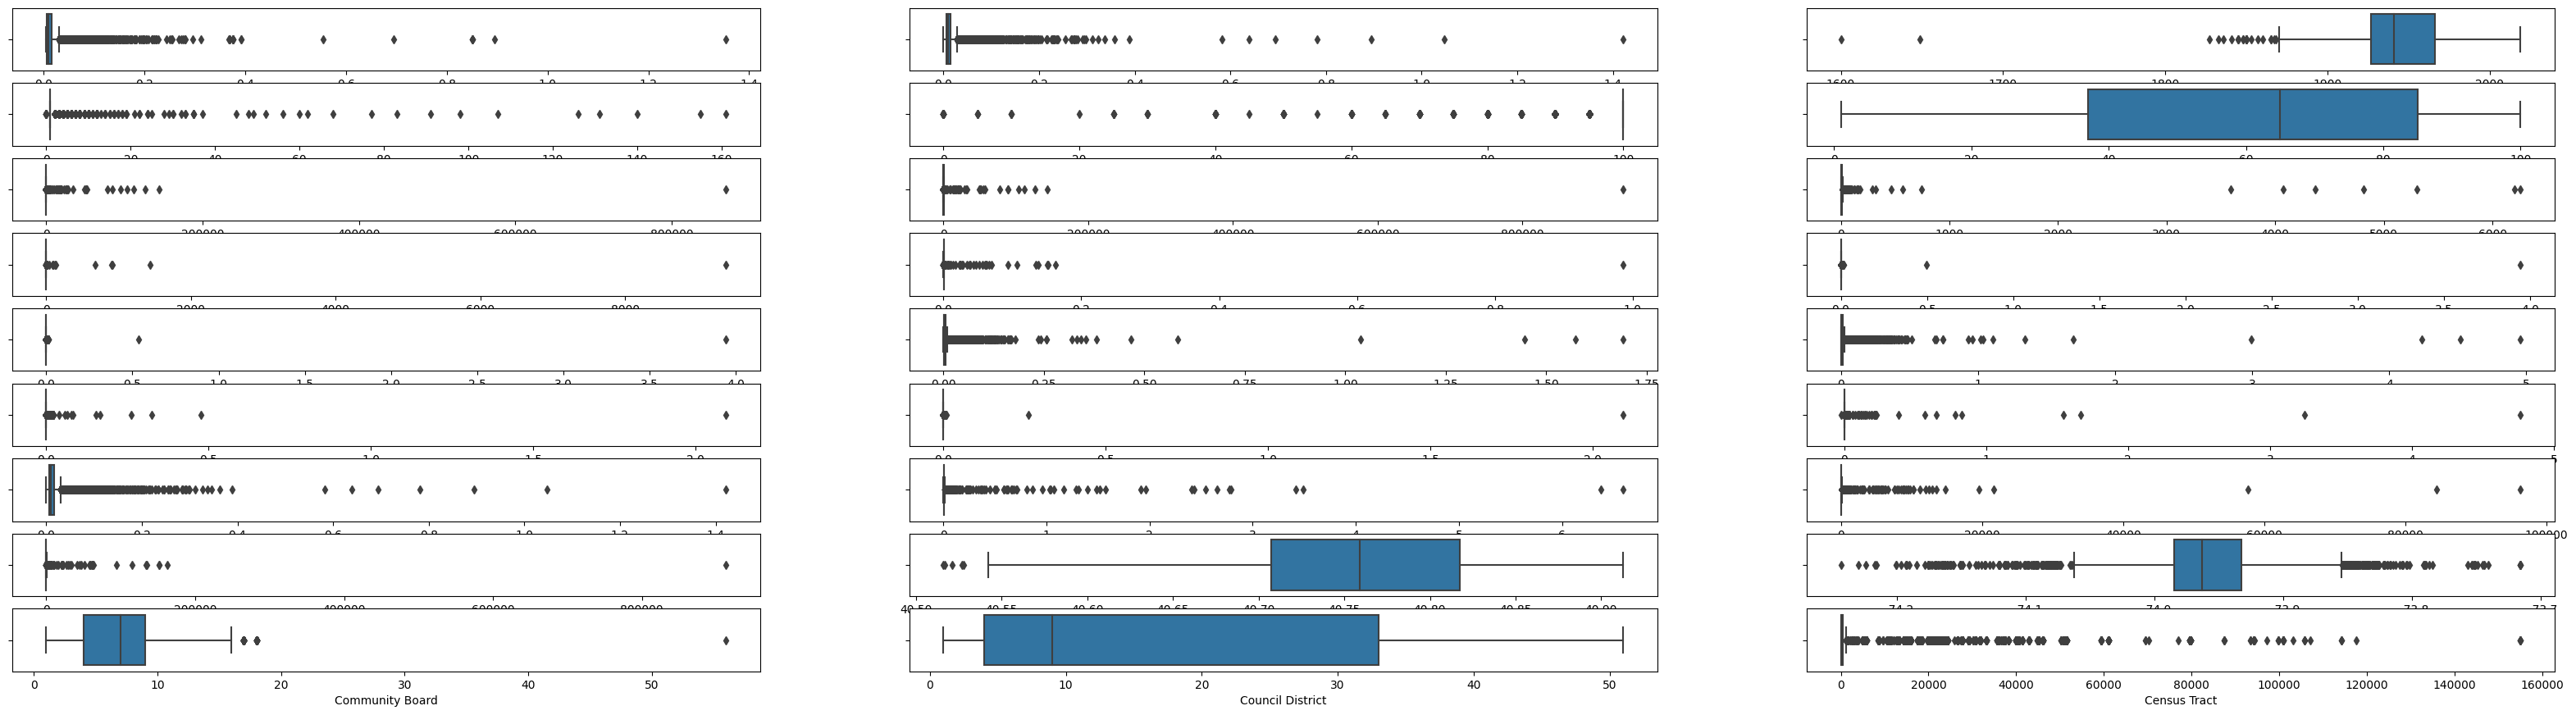

In [21]:
#checking outliers
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(40,45))

for col in num_cols:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.boxplot(x=df[col])
  c=c+1

In [22]:
from collections import Counter
def detection(df,features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1 = df[c].quantile(0.25)
        
        #3rd quartile
        Q3 = df[c].quantile(0.75)
        
        #IQR calculation
        IQR = Q3 - Q1
        lower_range = df[c].quantile(0.25) - 1.5* IQR
        upper_range = df[c].quantile(0.75) + 1.5* IQR
        
        #Outlier detection                                    #Outlier indexes
        outlier_list_col=df[  (df[c] < lower_range) | (df[c] > upper_range)  ].index
       
        #Store indexes
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    # number of outliers
   
    #we are taking indexes
    
    return outlier_indices

In [23]:
num_cols

DOF Gross Floor Area  \
0                  289356.0   
1                 3693539.0   
2                  152765.0   
3                  891040.0   
4                  211400.0   
...                     ...   
11741               70645.0   
11742               93500.0   
11743                   NaN   
11744               57824.0   
11745               60720.0   

       Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
0                                               293447.0         1963   
1                                              3889181.0         1969   
2                                               231342.0         1924   
3                                              1305748.0         1971   
4                                               179694.0         1932   
...                                                  ...          ...   
11741                                            74177.0         1928   
11742                                            93500.0         1926   
11743                                           103328.0         1913   
11744                                            60715.0         1928   
11745                                            63756.0         1930   

       Number of Buildings - Self-reported  Occupancy  ENERGY STAR Score  \
0                                        2        100                NaN   
1                                       12        100               55.0   
2                                        1        100                NaN   
3                                        1        100                NaN   
4                                        1        100                NaN   
...                                    ...        ...                ...   
11741                                    1        100               98.0   
11742                                    1        100               16.0   
11743                                    1         95               83.0   
11744                                    1        100               92.0   
11745                                    1        100               19.0   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
0                    305.6                                   303.1   
1                    229.8                                   228.8   
2                      NaN                                     NaN   
3                      NaN                                     NaN   
4                      NaN                                     NaN   
...                    ...                                     ...   
11741                 81.4                                    87.0   
11742                109.3                                   117.7   
11743                 44.3                                    43.9   
11744                 70.0                                    74.9   
11745                130.2                                   140.5   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                                   37.8         
1                                                   24.8         
2                                                    NaN         
3                                                    NaN         
4                                                    NaN         
...                                                  ...         
11741                                                3.3         
11742                                                5.3         
11743                                                7.7         
11744                                                2.6         
11745                                                3.4         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                    NaN            
1                                                    2.4            
2  

In [24]:
num_cols_list = list(num_cols)

In [25]:
num_cols_list

['DOF Gross Floor Area',
 'Largest Property Use Type - Gross Floor Area (ft²)',
 'Year Built',
 'Number of Buildings - Self-reported',
 'Occupancy',
 'ENERGY STAR Score',
 'Site EUI (kBtu/ft²)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Weather Normalized Site Electricity (kWh)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Indirect GHG Emissions (Metric Tons CO2e)',
 'Property GFA - Self-Reported (ft²)',
 'Water Use (All Water Sources) (kgal)',
 'Water Intensity (All Water Sources) (gal/ft²)',
 'Source EUI (kBtu/ft²)',
 'Latitude',
 'Longitude',
 'Community Board',
 'Council District',
 'Census Tract']

In [26]:
outliers = detection(df,num_cols_list)

In [27]:
df.loc[outliers]

Parent Property Name     Address 1 (self-reported)  \
1               NYP Columbia (West Campus)              622 168th Street   
3               NYP Columbia (West Campus)       161 Fort Washington Ave   
5                NYP Cornell (East Campus)          525 East 68th Street   
7                       North Shore Towers  270-10 Grand Central Parkway   
8                       North Shore Towers  272-86 Grand Central Parkway   
...                                    ...                           ...   
9541   Not Applicable: Standalone Property    1150 Brighton Beach Avenue   
9542   Not Applicable: Standalone Property         200 Brighton 15th st.   
9544   Not Applicable: Standalone Property              200 Corbin Place   
11736  Not Applicable: Standalone Property          1955 Grand Concourse   
11737  Not Applicable: Standalone Property               1480 Popham Ave   

         Borough  DOF Gross Floor Area  Primary Property Type - Self Selected  \
1      Manhattan             3693539.0  Hospital (General Medical & Surgical)   
3      Manhattan              891040.0  Hospital (General Medical & Surgical)   
5      Manhattan             2230742.0  Hospital (General Medical & Surgical)   
7         Queens             3750565.0                    Multifamily Housing   
8         Queens             3750565.0                                  Other   
...          ...                   ...                                    ...   
9541    Brooklyn              162957.0                    Multifamily Housing   
9542    Brooklyn               96600.0                    Multifamily Housing   
9544    Brooklyn              146834.0                    Multifamily Housing   
11736      Bronx               59800.0                    Multifamily Housing   
11737      Bronx               60480.0                    Multifamily Housing   

              List of All Property Use Types at Property  \
1                  Hospital (General Medical & Surgical)   
3                  Hospital (General Medical & Surgical)   
5                  Hospital (General Medical & Surgical)   
7      Financial Office, Medical Office, Multifamily ...   
8                                                  Other   
...                                                  ...   
9541                                 Multifamily Housing   
9542                        Multifamily Housing, Parking   
9544                                 Multifamily Housing   
11736                                Multifamily Housing   
11737                                Multifamily Housing   

                   Largest Property Use Type  \
1      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
5      Hospital (General Medical & Surgical)   
7                        Multifamily Housing   
8                                      Other   
...                                      ...   
9541                     Multifamily Housing   
9542                     Multifamily Housing   
9544                     Multifamily Housing   
11736                    Multifamily Housing   
11737                    Multifamily Housing   

       Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
1                                              3889181.0         1969   
3                                              1305748.0         1971   
5                                              2971874.0         1932   
7                                              2400000.0         1974   
8                                                  200.0         1974   
...                                                  ...          ...   
9541                                            167846.0         1935   
9542                                             96600.0         1951   
9544                                            151239.0         1961   
11736                                            67350.0         1930   
11737                              

In [28]:
data = df.drop(outliers,axis=0).reset_index(drop = True)

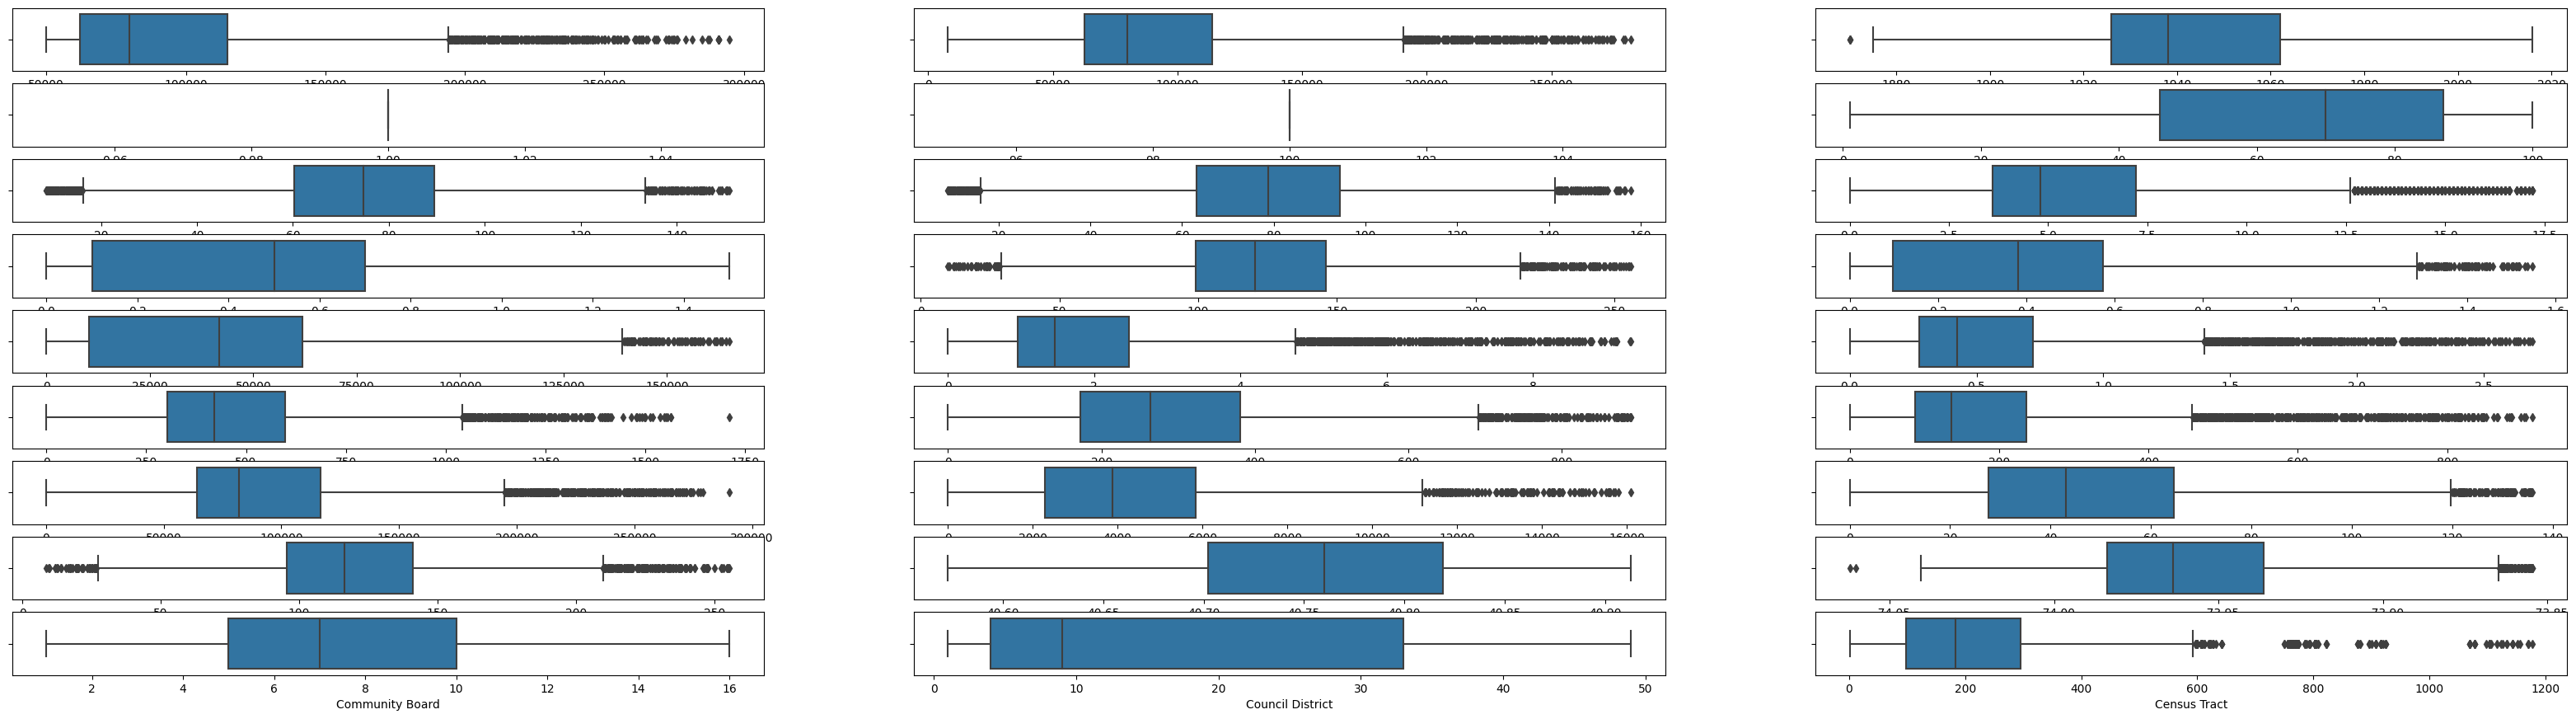

In [29]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(40,45))

for col in num_cols:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.boxplot(x=data[col])
  c=c+1

#better but still a lot 

In [30]:
data.describe()

DOF Gross Floor Area  \
count           6268.000000   
mean           95331.876516   
std            44649.962793   
min            50028.000000   
25%            62099.000000   
50%            79910.000000   
75%           114994.000000   
max           294821.000000   

       Largest Property Use Type - Gross Floor Area (ft²)   Year Built  \
count                                        6291.000000   6292.000000   
mean                                        94263.622095   1946.043388   
std                                         43442.699988     29.548785   
min                                          8000.000000   1870.000000   
25%                                         62625.000000   1926.000000   
50%                                         80000.000000   1938.000000   
75%                                        113891.000000   1962.000000   
max                                        281941.000000   2016.000000   

       Number of Buildings - Self-reported  Occupancy  ENERGY STAR Score  \
count                               6292.0     6292.0        5261.000000   
mean                                   1.0      100.0          64.421973   
std                                    0.0        0.0          27.241580   
min                                    1.0      100.0           1.000000   
25%                                    1.0      100.0          46.000000   
50%                                    1.0      100.0          70.000000   
75%                                    1.0      100.0          87.000000   
max                                    1.0      100.0         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count          6232.000000                             5515.000000   
mean             73.989265                               77.812947   
std              25.660435                               26.955478   
min               8.600000                                9.000000   
25%              60.175000                               63.100000   
50%              74.700000                               78.800000   
75%              89.525000                               94.500000   
max             151.000000                              157.900000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                        5904.000000         
mean                                            5.829590         
std                                             3.263483         
min                                             0.000000         
25%                                             3.600000         
50%                                             4.800000         
75%                                             7.200000         
max                                            17.200000         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
count                                        5416.000000            
mean                                            0.454838            
std                                             0.319306            
min                                             0.000000            
25%                                             0.100000            
50%                                             0.500000            
75%                                             0.700000            
max                                             1.500000            

       Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
count                               5515.000000            5.705000e+03   
mean                                 123.159347            3.960240e+06   
std                                   39.850901            3.182682e+06   
min                                    9.800000            0.000000e+00   
25%                                   99.100000            9.755530e+05   
50%                                  120.600000            3.825439e+06   
75

In [31]:
df.shape

(11746, 38)

In [32]:
data.shape

(6292, 38)

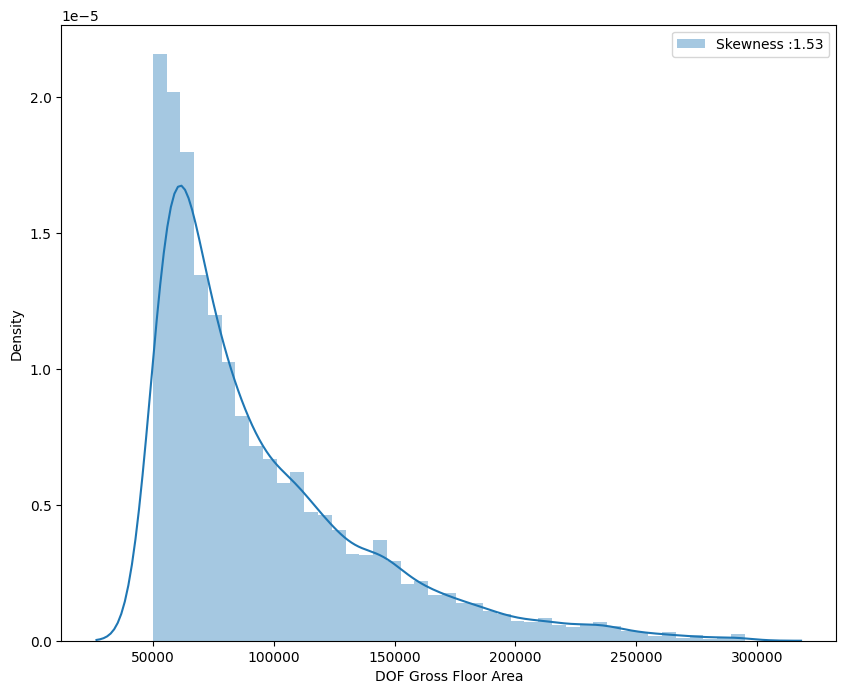

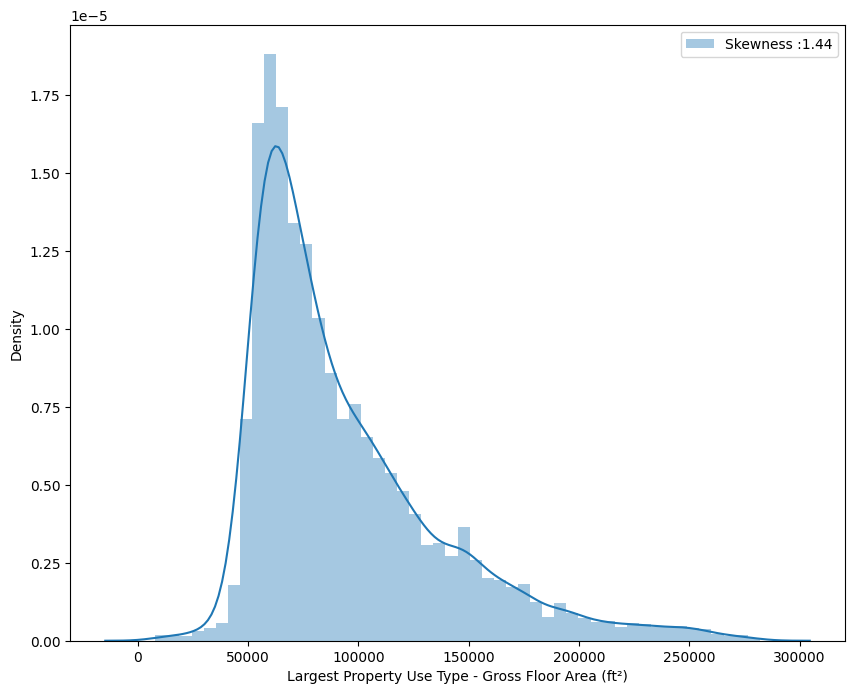

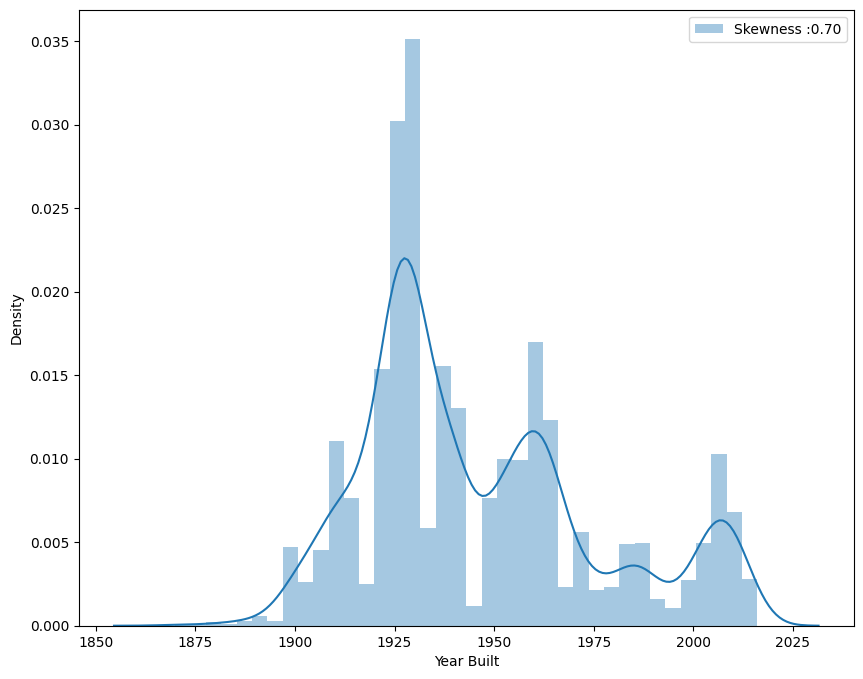

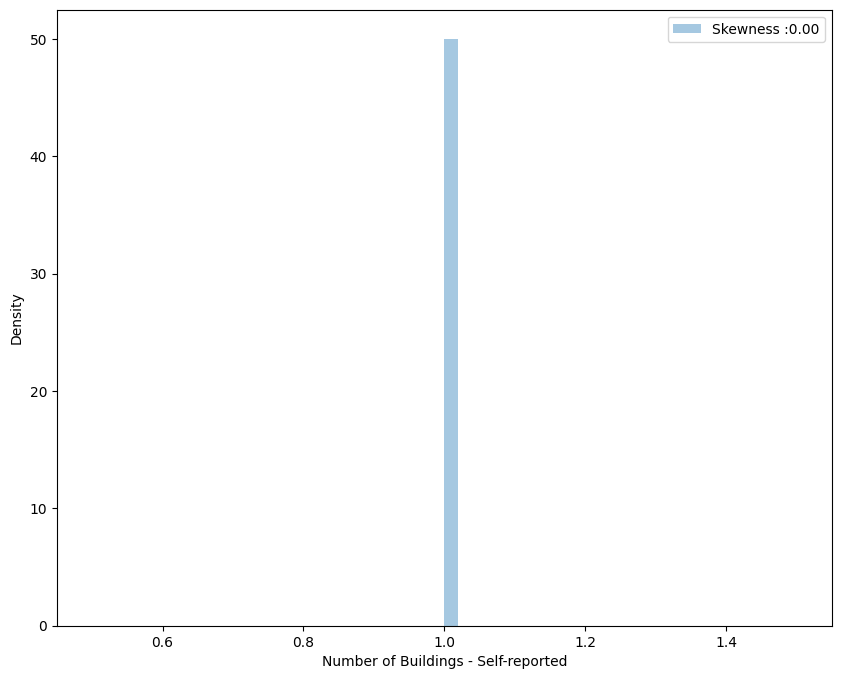

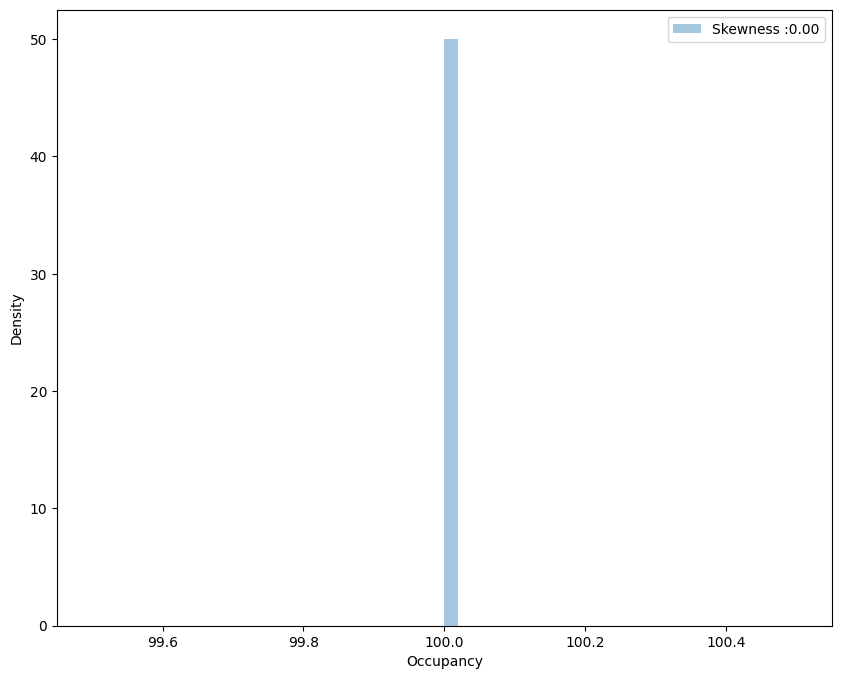

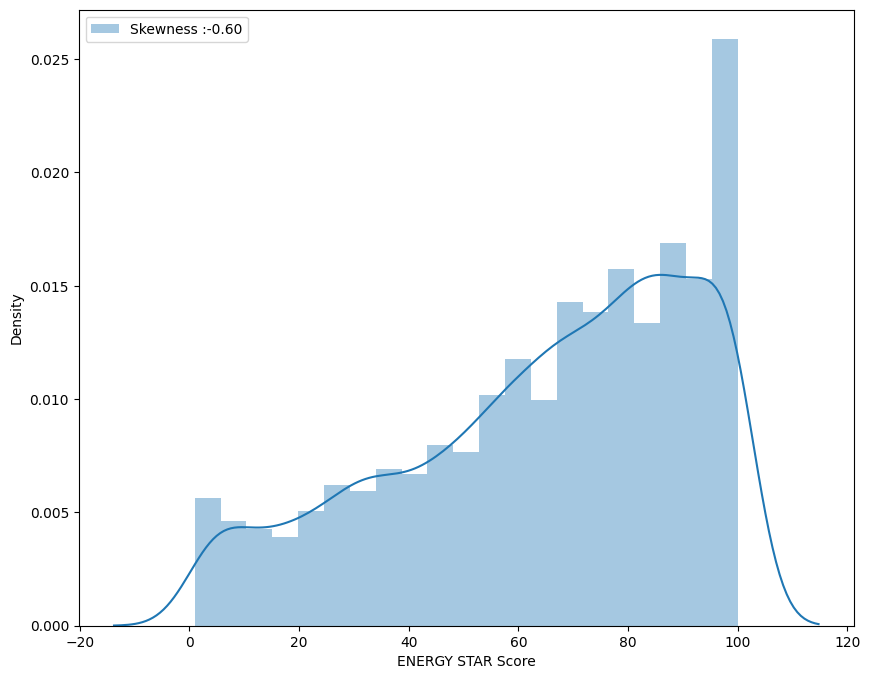

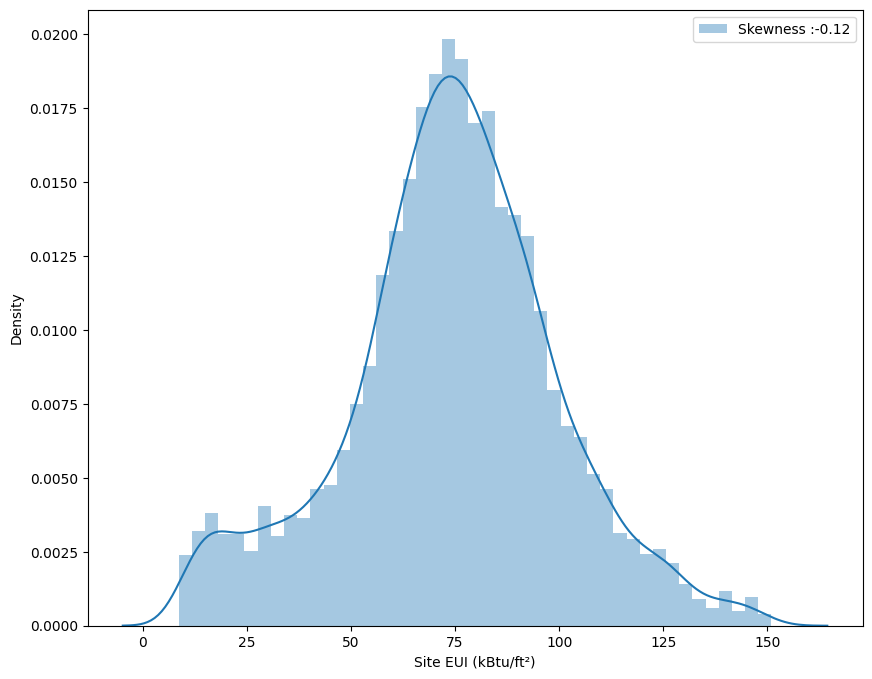

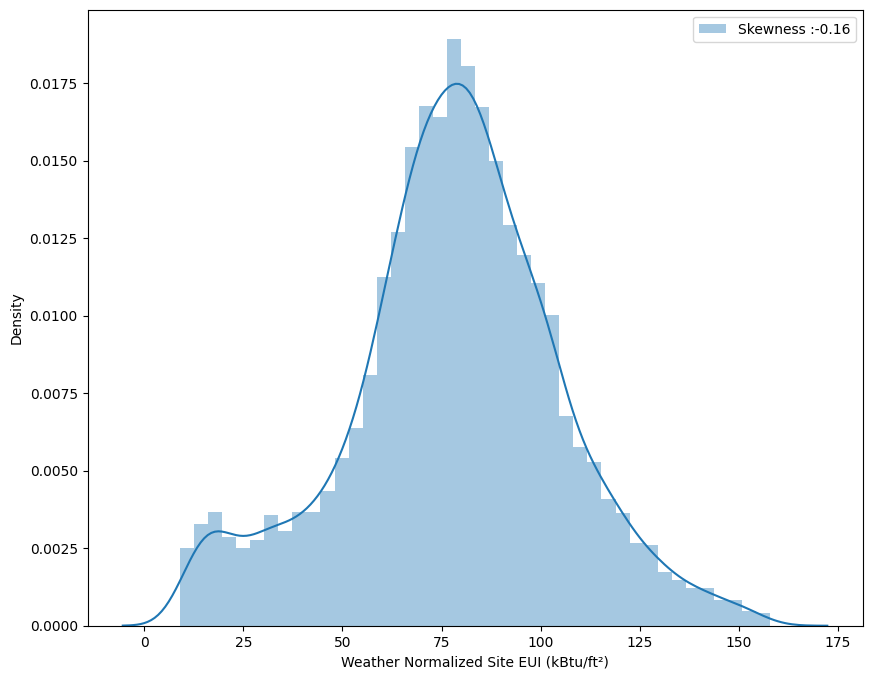

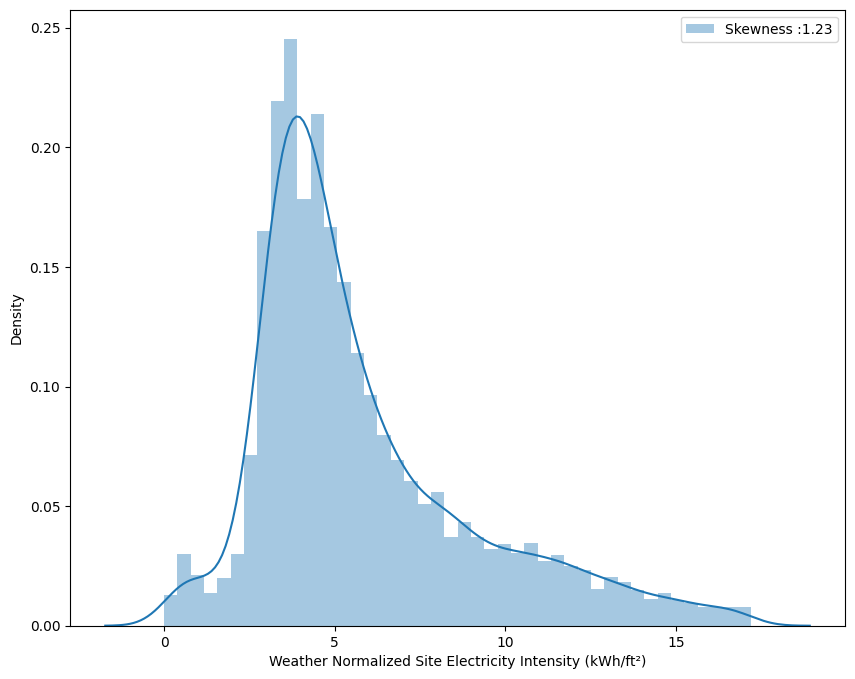

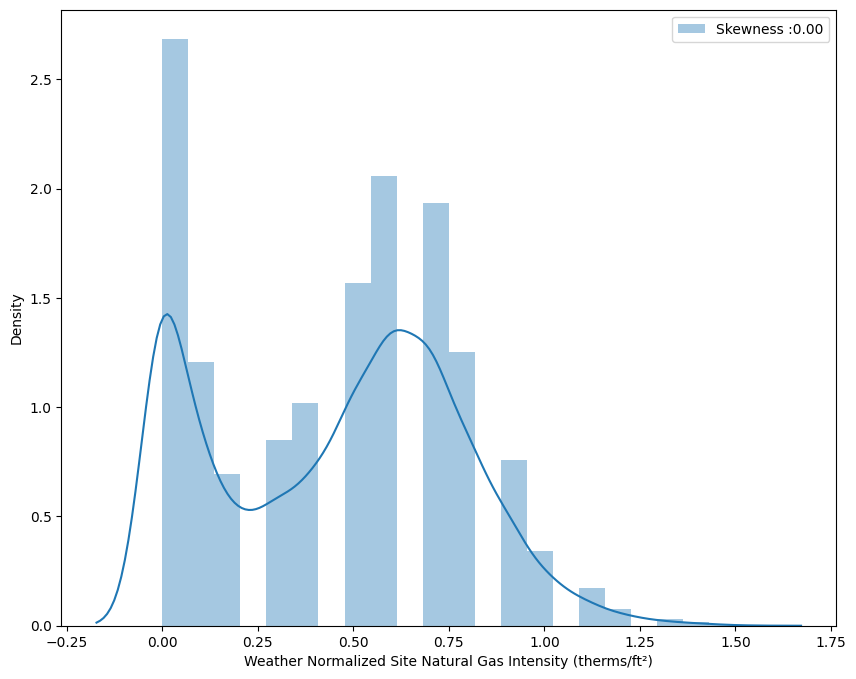

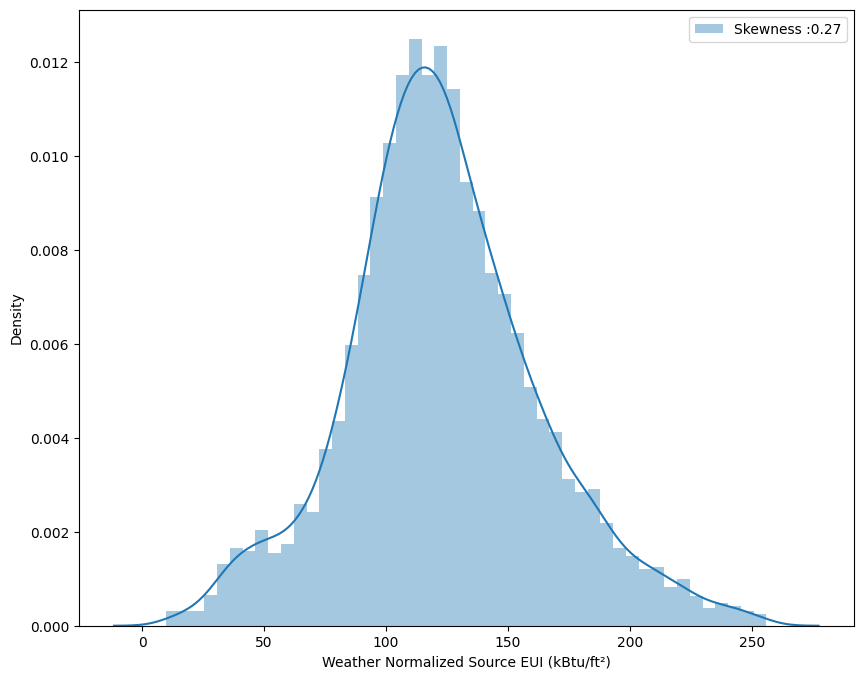

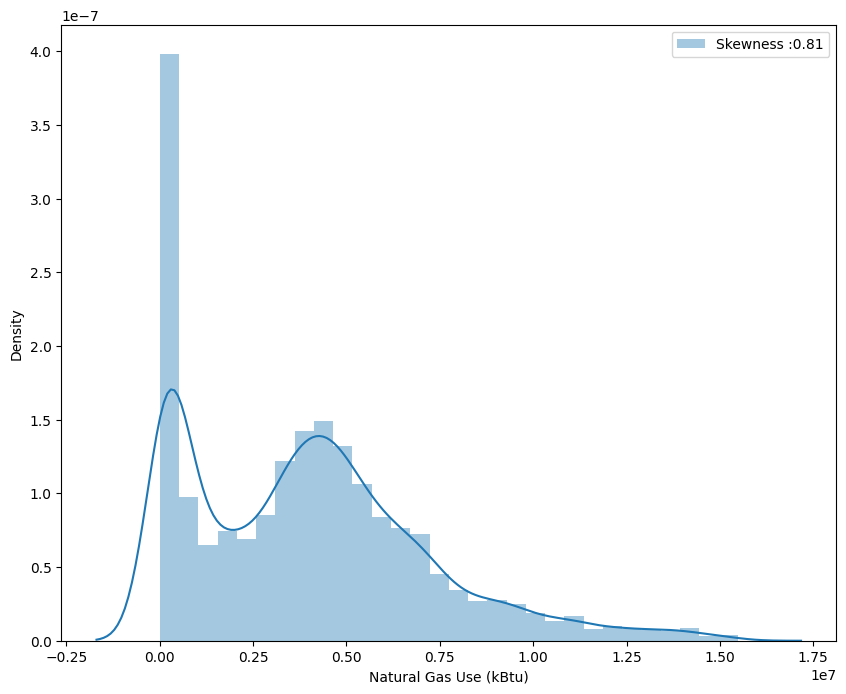

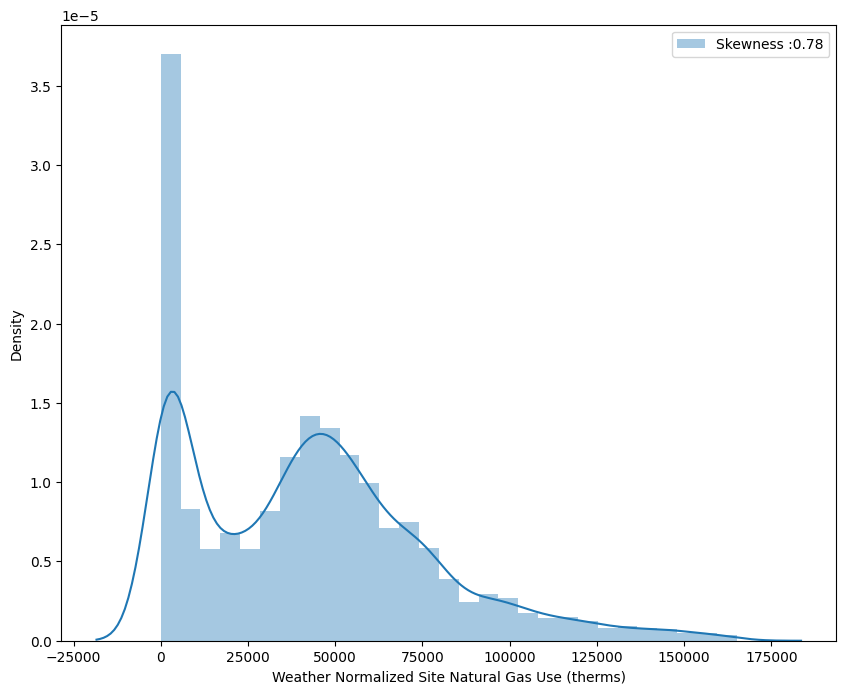

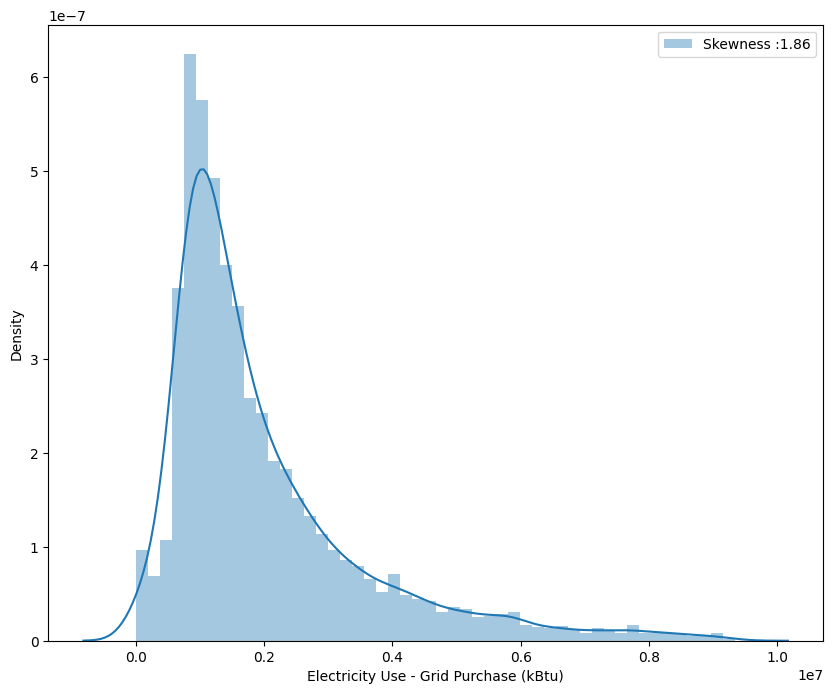

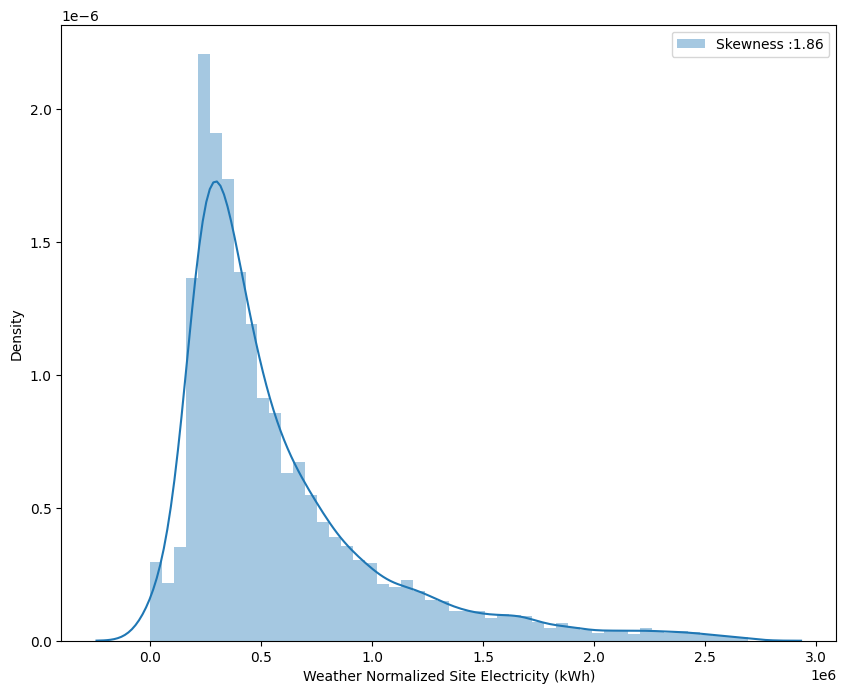

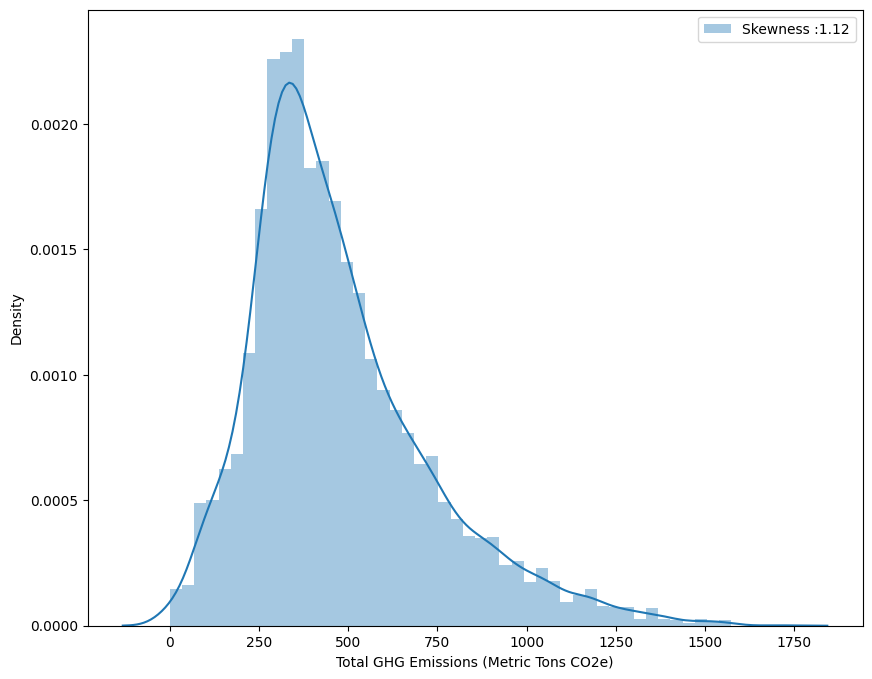

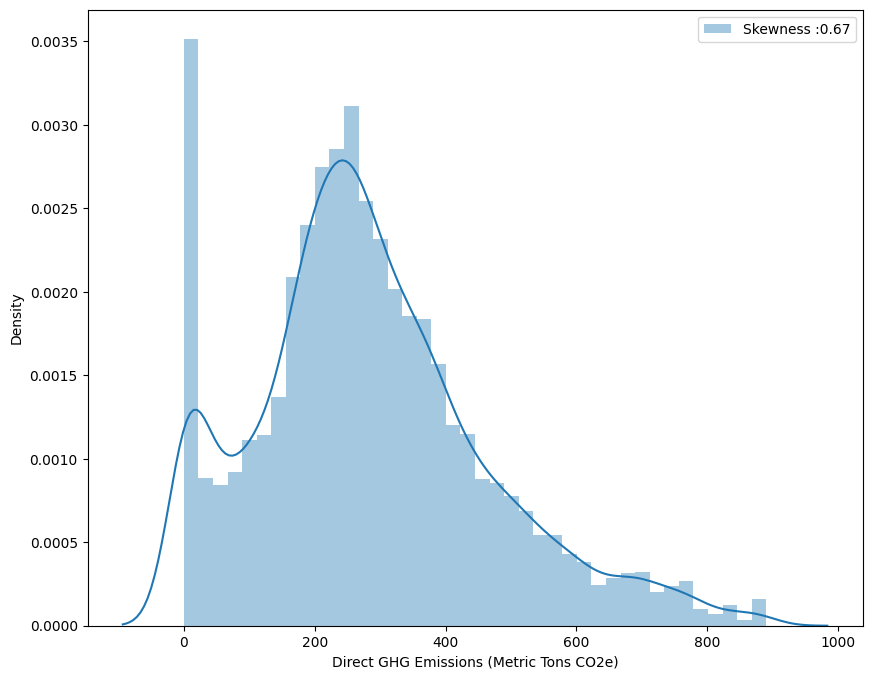

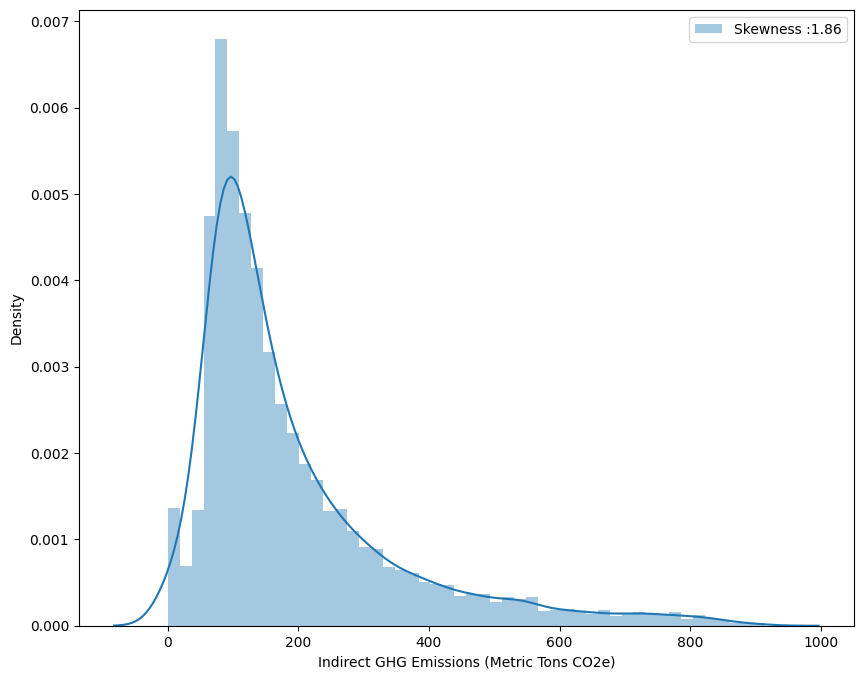

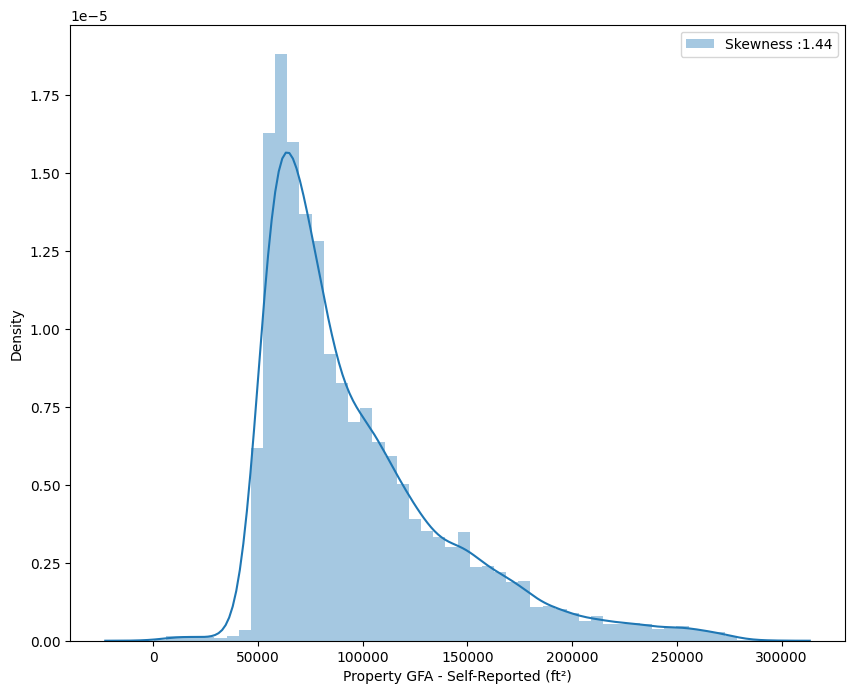

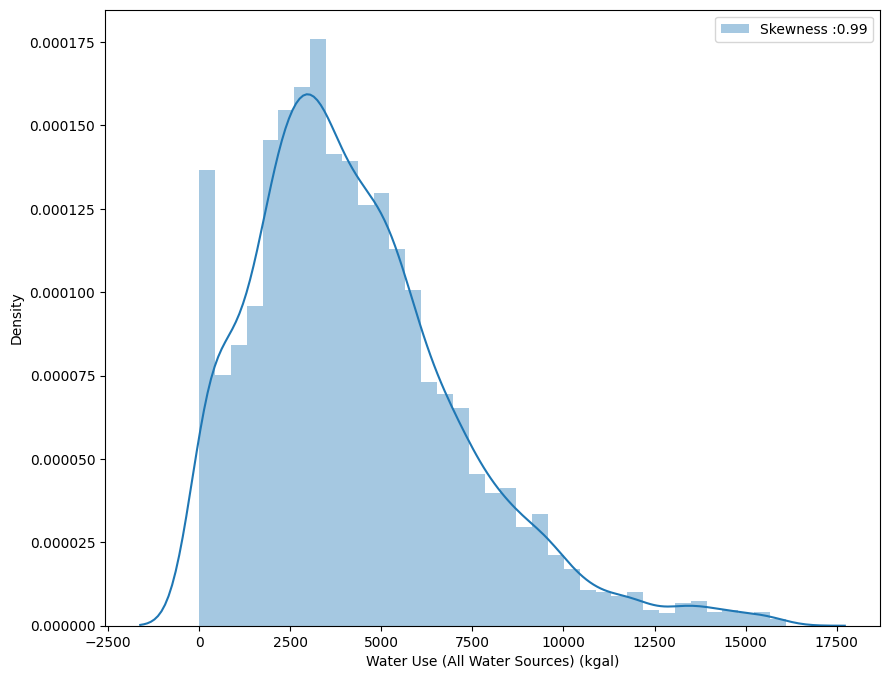

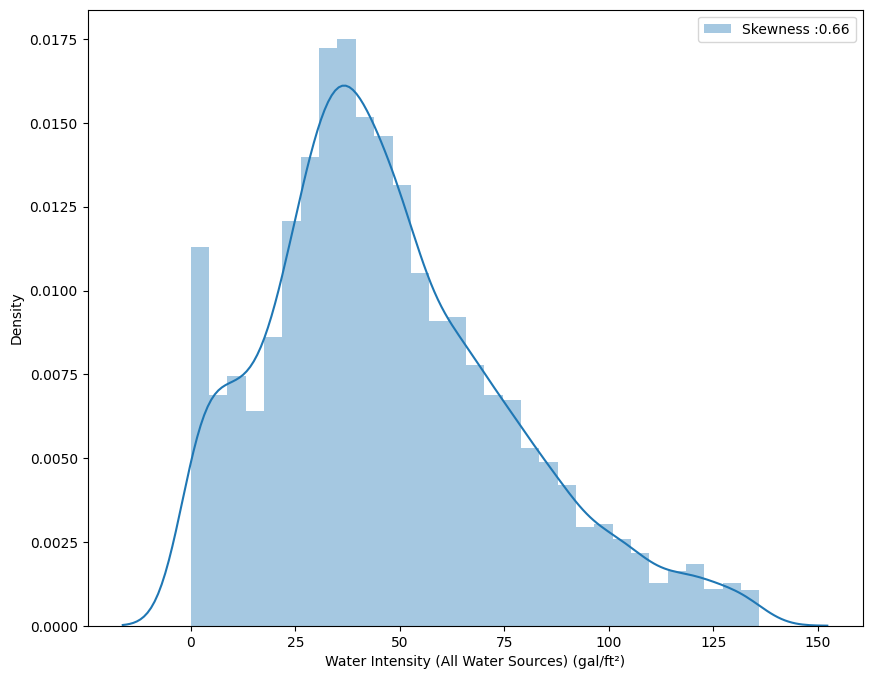

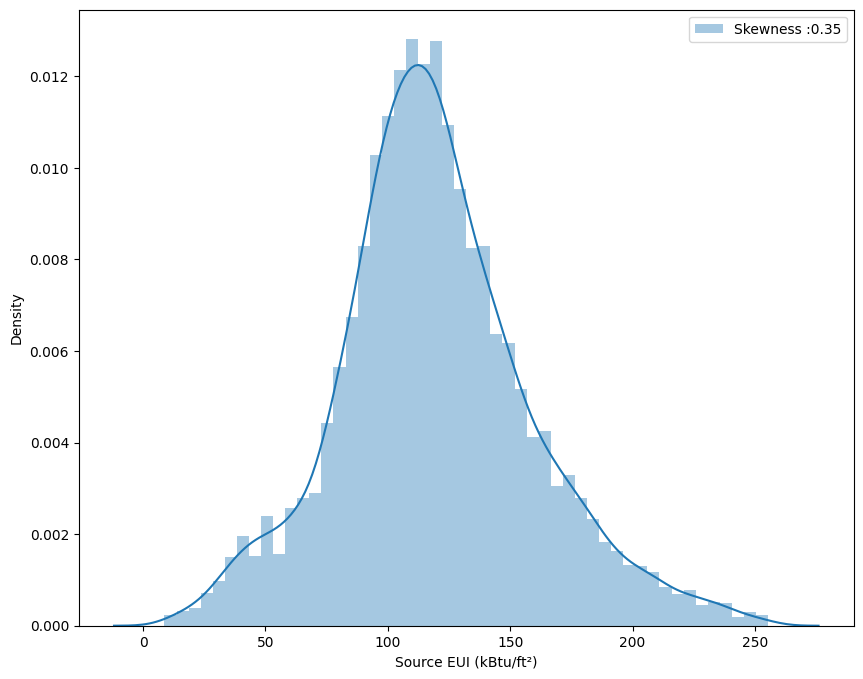

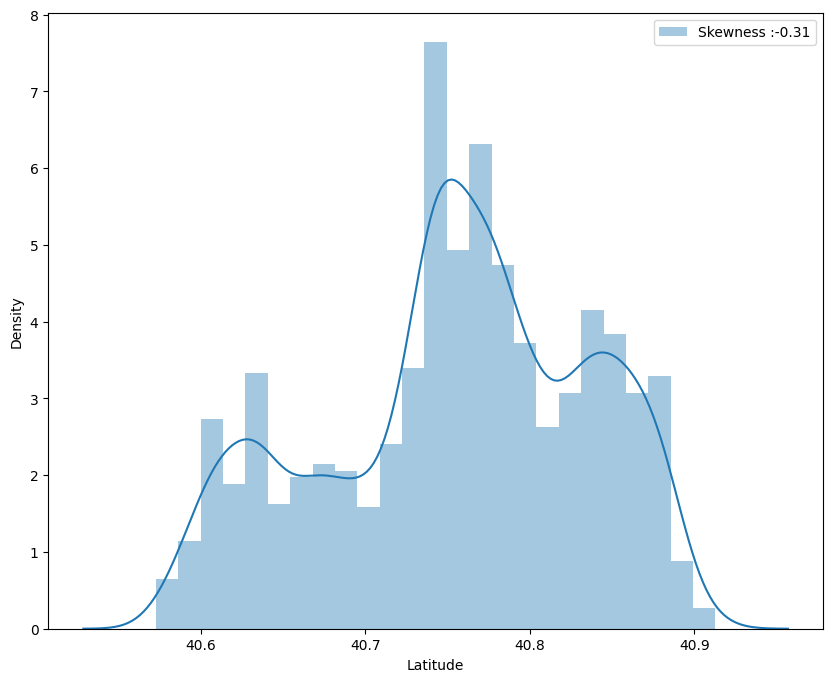

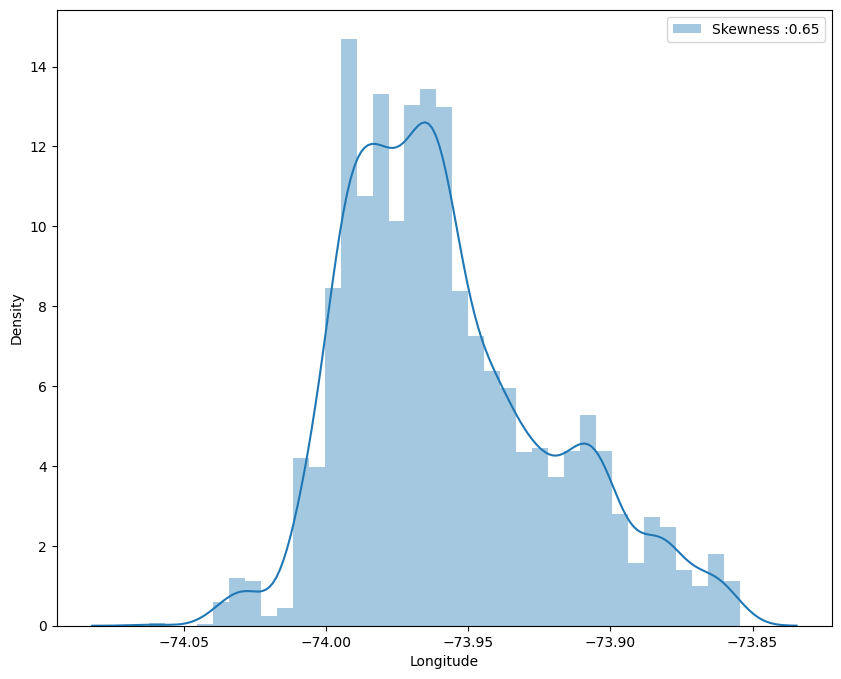

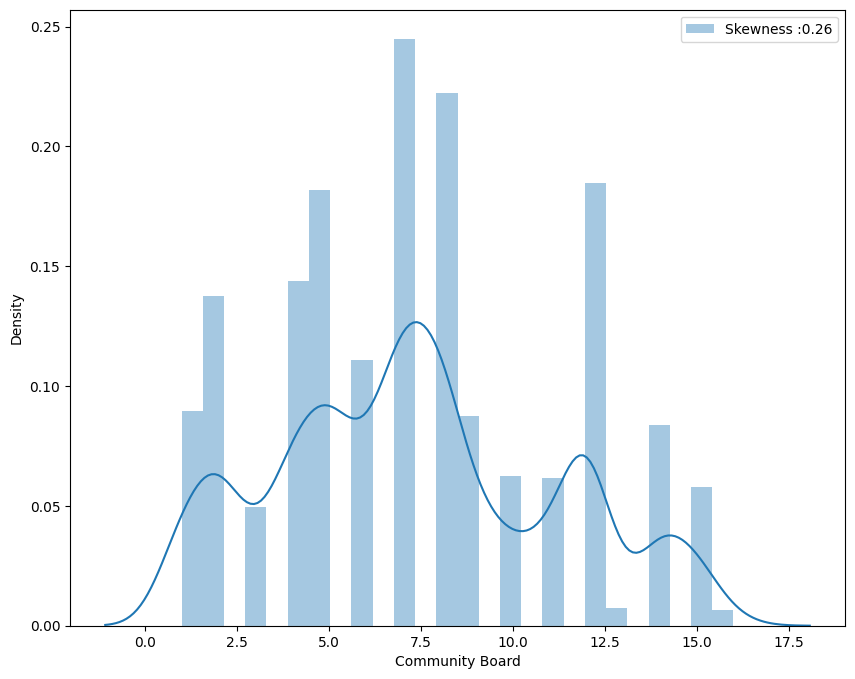

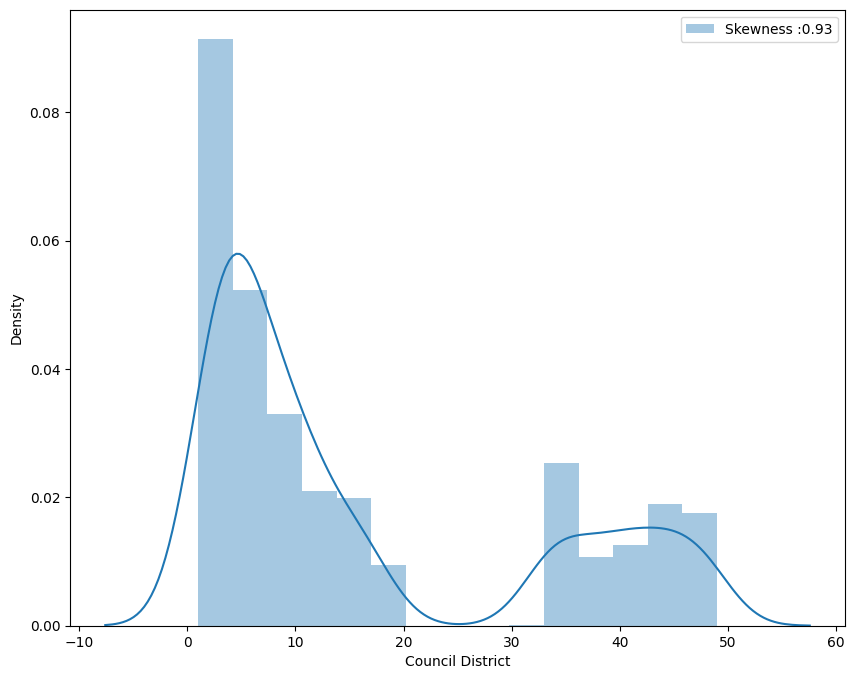

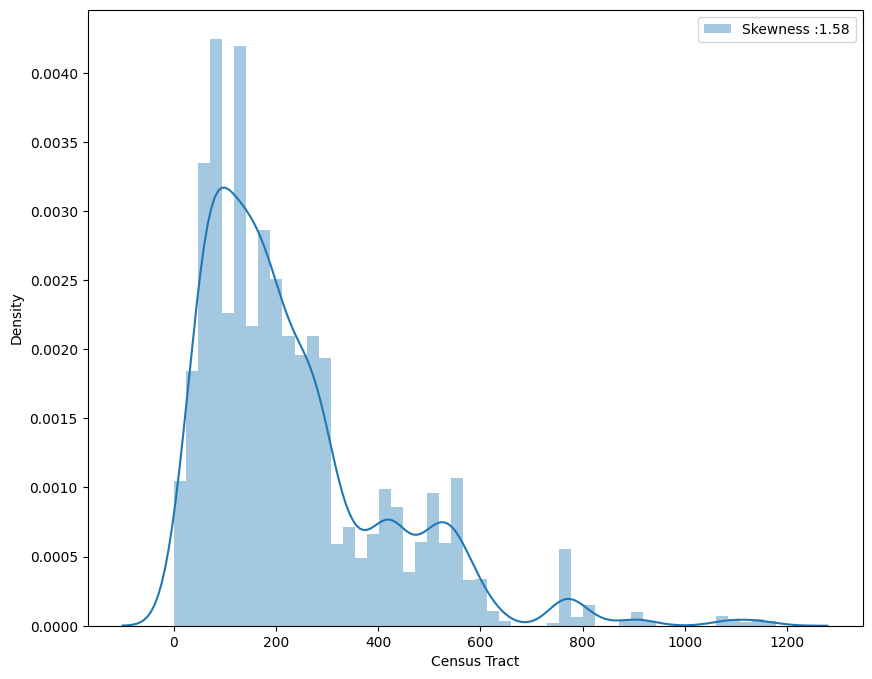

In [33]:
for col in num_cols:
  plt.figure(figsize=(10,8))
  plt.xlabel(col)
  sns.distplot(x=data[col],label='Skewness :%.2f'%(data[col].skew()))
  plt.legend()
  plt.show()

In [34]:
#few variables positively skewed

In [84]:
df.skew().sort_values(ascending=False)

Direct GHG Emissions (Metric Tons CO2e)                       105.690836
Natural Gas Use (kBtu)                                         99.343099
Weather Normalized Site Natural Gas Use (therms)               96.477511
Total GHG Emissions (Metric Tons CO2e)                         94.155755
Weather Normalized Site Natural Gas Intensity (therms/ft²)     92.735657
Site EUI (kBtu/ft²)                                            90.254339
Weather Normalized Site EUI (kBtu/ft²)                         87.051948
Source EUI (kBtu/ft²)                                          83.404776
Weather Normalized Source EUI (kBtu/ft²)                       81.533225
Indirect GHG Emissions (Metric Tons CO2e)                      62.397525
Water Intensity (All Water Sources) (gal/ft²)                  42.780992
Weather Normalized Site Electricity Intensity (kWh/ft²)        41.032173
Electricity Use - Grid Purchase (kBtu)                         37.120637
Weather Normalized Site Electricity (kWh)          

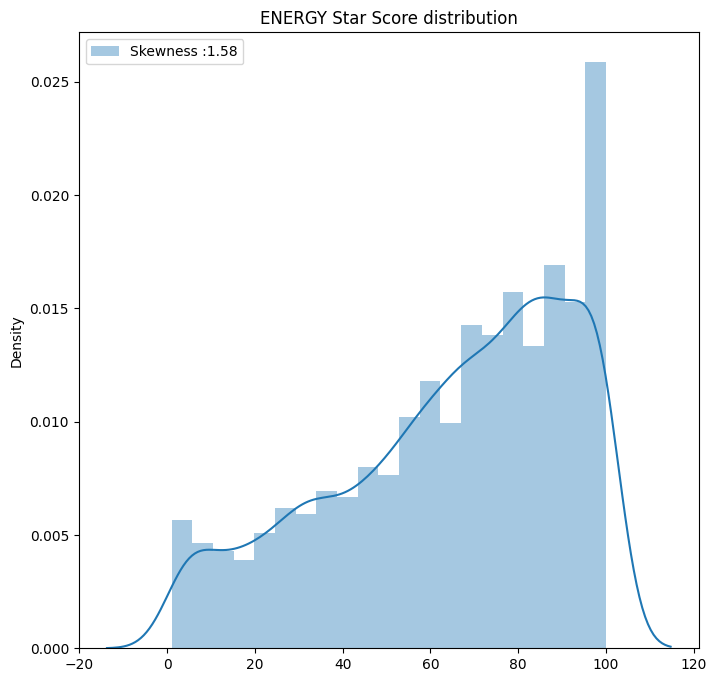

In [35]:
plt.figure(figsize=(8,8))
sns.distplot(x=data['ENERGY STAR Score'],label='Skewness :%.2f'%(data[col].skew()))
plt.title('ENERGY Star Score distribution')
plt.legend()
plt.show()

In [ ]:
#skewed negatively most buildings have a good (over 60) ESS

In [36]:
most_types = data['Primary Property Type - Self Selected'].value_counts().sort_values(ascending=False)[:10].index
most_types

Index(['Multifamily Housing', 'Office', 'Non-Refrigerated Warehouse', 'Other',
       'Residence Hall/Dormitory', 'K-12 School', 'Self-Storage Facility',
       'Hotel', 'Distribution Center', 'College/University'],
      dtype='object')

In [37]:
df_most_types = data[data['Primary Property Type - Self Selected'].isin(most_types)]
df_most_types

Parent Property Name    Address 1 (self-reported)  \
2     720-730 Ft. Washington Owners Corp.  720-730 Ft. Washington Ave.   
3                   Park 76th Street Inc.              830 Park Avenue   
4                   Park 76th Street Inc.              840 Park Avenue   
5       Columbia University (morningside)               420 W 116th St   
6       Columbia University (morningside)        508 West 114th Street   
...                                   ...                          ...   
6287  Not Applicable: Standalone Property             161 Henry Street   
6288  Not Applicable: Standalone Property              24 Monroe Place   
6289  Not Applicable: Standalone Property         150 Joralemon Street   
6290  Not Applicable: Standalone Property        27 Prospect Park West   
6291  Not Applicable: Standalone Property            420 Clinton Ave\t   

        Borough  DOF Gross Floor Area Primary Property Type - Self Selected  \
2     Manhattan              102150.0                   Multifamily Housing   
3     Manhattan              151666.0                   Multifamily Housing   
4     Manhattan               64827.0                   Multifamily Housing   
5           NaN                   NaN                                Office   
6           NaN                   NaN              Residence Hall/Dormitory   
...         ...                   ...                                   ...   
6287   Brooklyn               51110.0                   Multifamily Housing   
6288   Brooklyn               70645.0                   Multifamily Housing   
6289   Brooklyn               93500.0                   Multifamily Housing   
6290   Brooklyn               57824.0                   Multifamily Housing   
6291   Brooklyn               60720.0                   Multifamily Housing   

     List of All Property Use Types at Property Largest Property Use Type  \
2                           Multifamily Housing       Multifamily Housing   
3                           Multifamily Housing       Multifamily Housing   
4                           Multifamily Housing       Multifamily Housing   
5                                        Office                    Office   
6                      Residence Hall/Dormitory  Residence Hall/Dormitory   
...                                         ...                       ...   
6287                        Multifamily Housing       Multifamily Housing   
6288                        Multifamily Housing       Multifamily Housing   
6289                 Multifamily Housing, Other       Multifamily Housing   
6290                        Multifamily Housing       Multifamily Housing   
6291                        Multifamily Housing       Multifamily Housing   

      Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
2                                              116744.0         1939   
3                                              130629.0         1911   
4                                               54913.0         1911   
5                                               50000.0         1906   
6                                               48608.0         1898   
...                                                 ...          ...   
6287                                            53665.0         1906   
6288                                            74177.0         1928   
6289                                            93500.0         1926   
6290                                            60715.0         1928   
6291                                            63756.0         1930   

      Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
2                                       1        100         Whole Building   
3                                       1        100  Another configuration   
4                                       1        100  Another configuration   
5                                       1        100         Whole Building  

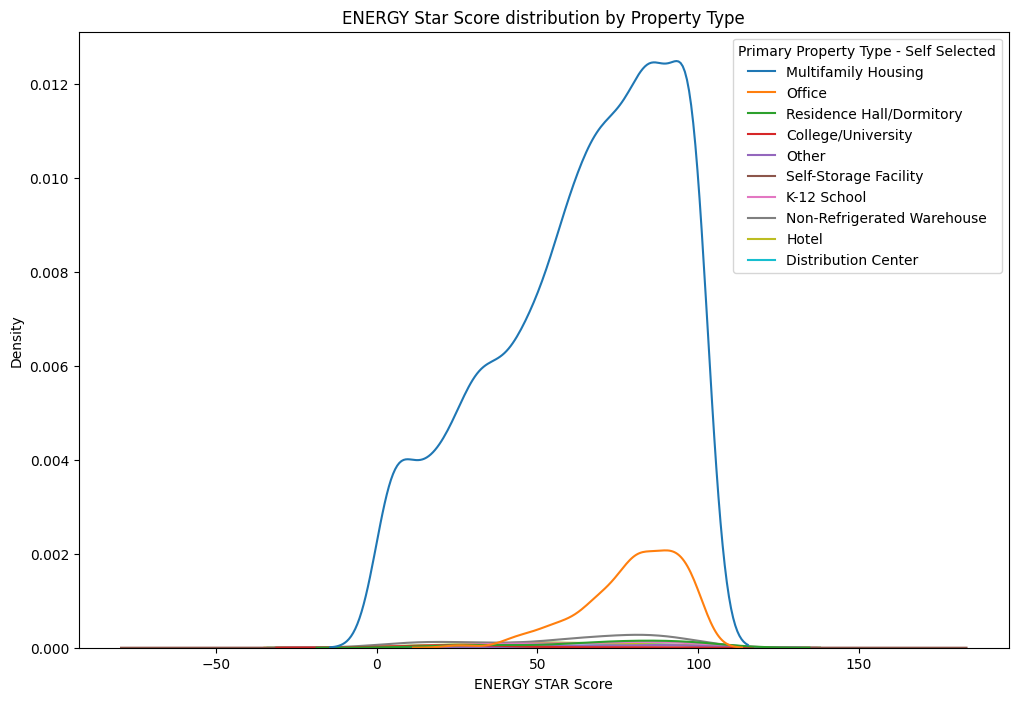

In [38]:
plt.figure(figsize=(12,8))
sns.kdeplot(x=data['ENERGY STAR Score'],hue=df_most_types['Primary Property Type - Self Selected'])
plt.title('ENERGY Star Score distribution by Property Type')
plt.show()

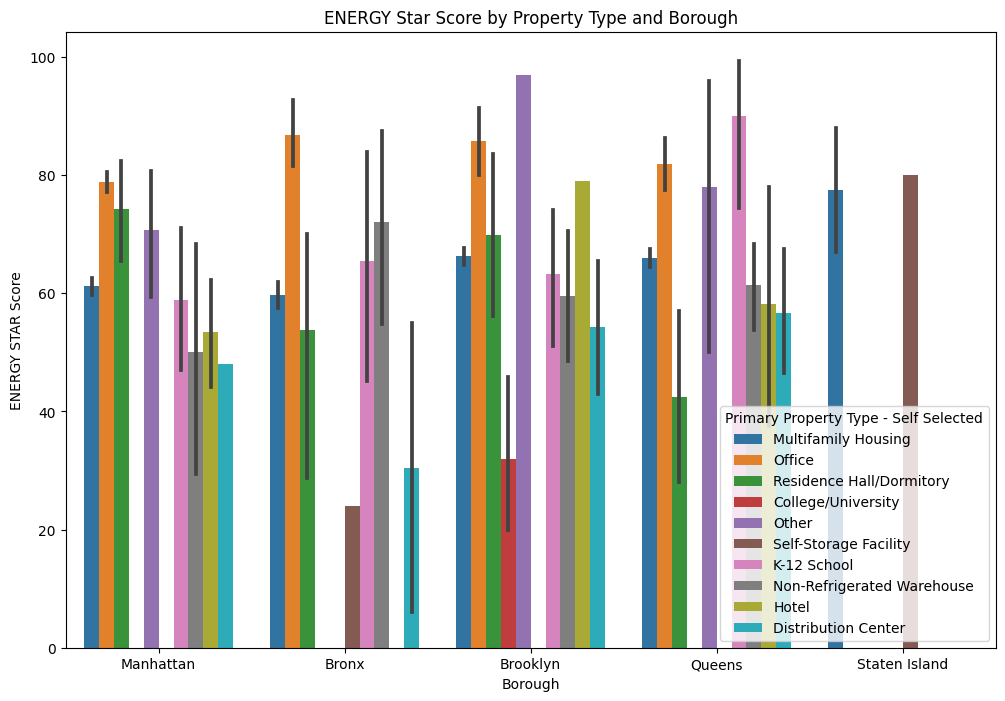

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(y=data['ENERGY STAR Score'],x=df_most_types['Borough'],hue=df_most_types['Primary Property Type - Self Selected'])
plt.title('ENERGY Star Score by Property Type and Borough')
plt.show()

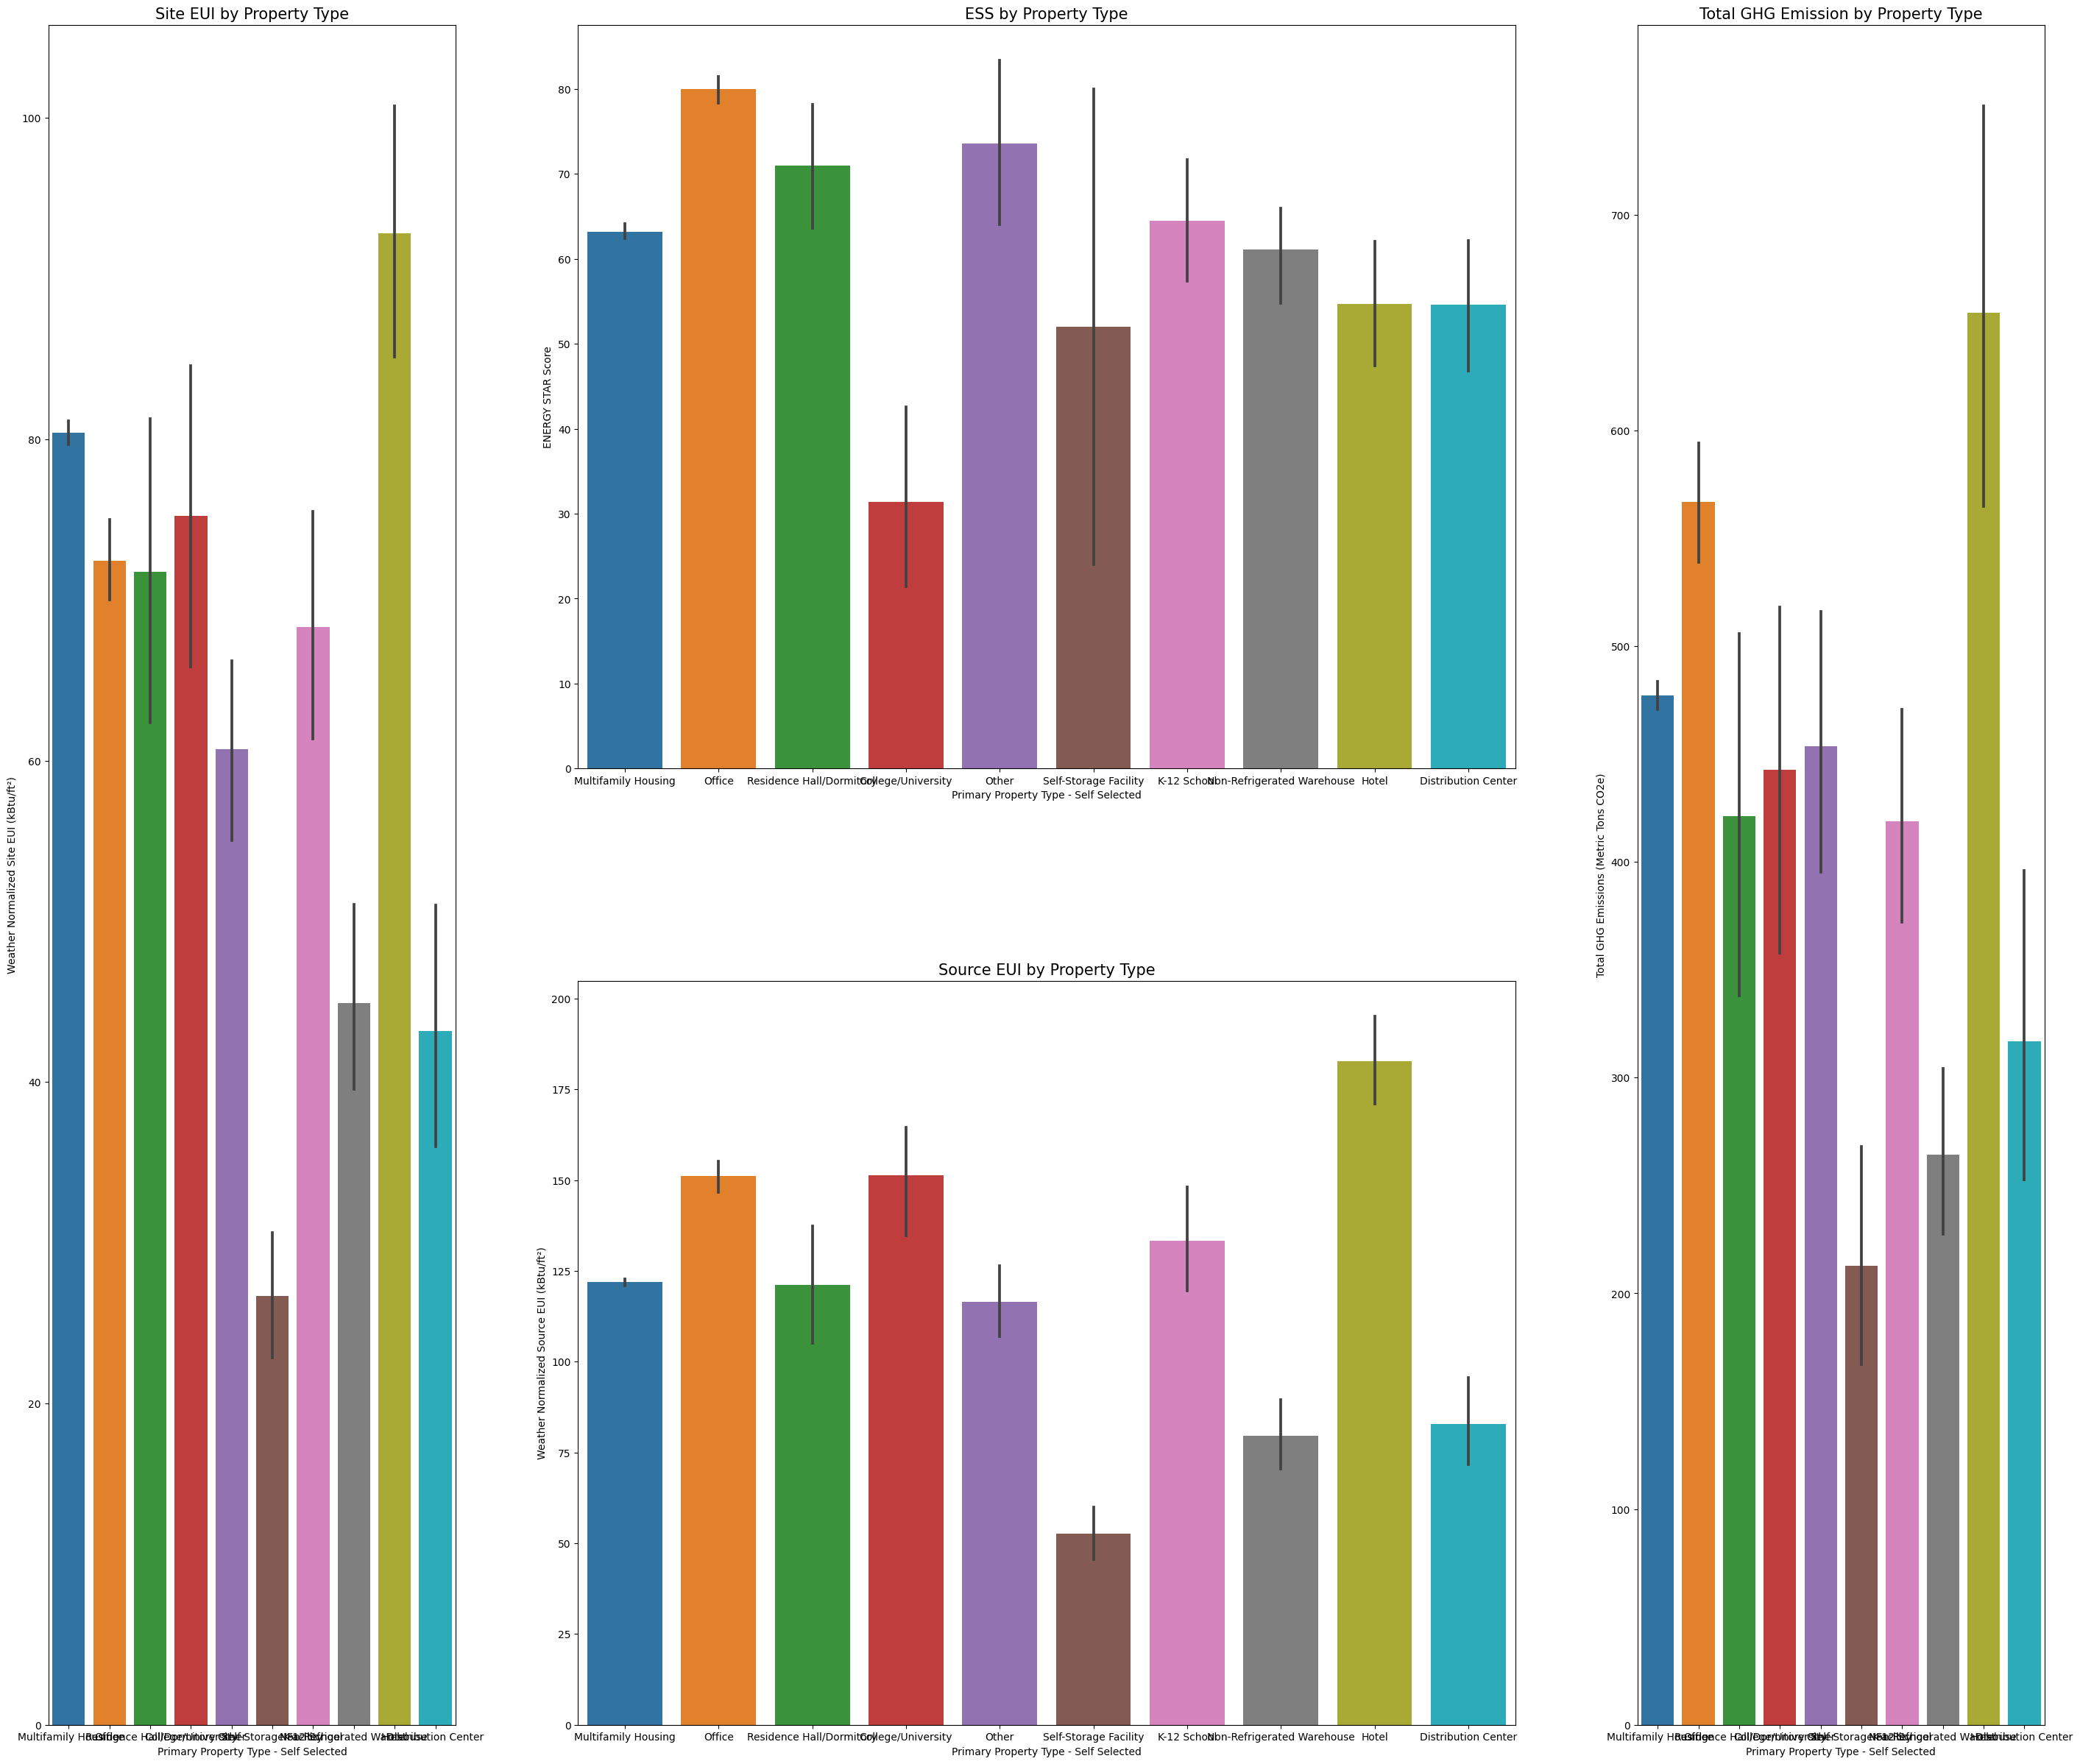

In [40]:
plt.figure(figsize = (35,30))
grid = plt.GridSpec(4, 4, wspace =0.3, hspace = 0.8)

g1 = plt.subplot(grid[:, 0])
g2 = plt.subplot(grid[:2, 1:3])
g3 = plt.subplot(grid[2:, 1:3])
g4 = plt.subplot(grid[:, 3])

g1.set_title('Site EUI by Property Type', fontsize=15)
g2.set_title('ESS by Property Type', fontsize=15)
g3.set_title('Source EUI by Property Type', fontsize=15)
g4.set_title('Total GHG Emission by Property Type', fontsize=15)

sns.barplot(y=data['Weather Normalized Site EUI (kBtu/ft²)'],x=df_most_types['Primary Property Type - Self Selected'],ax=g1)

sns.barplot(y=data['ENERGY STAR Score'],x=df_most_types['Primary Property Type - Self Selected'],ax=g2)

sns.barplot(y=data['Weather Normalized Source EUI (kBtu/ft²)'],x=df_most_types['Primary Property Type - Self Selected'],ax=g3)

sns.barplot(y=data['Total GHG Emissions (Metric Tons CO2e)'],x=df_most_types['Primary Property Type - Self Selected'],ax=g4)

plt.show()

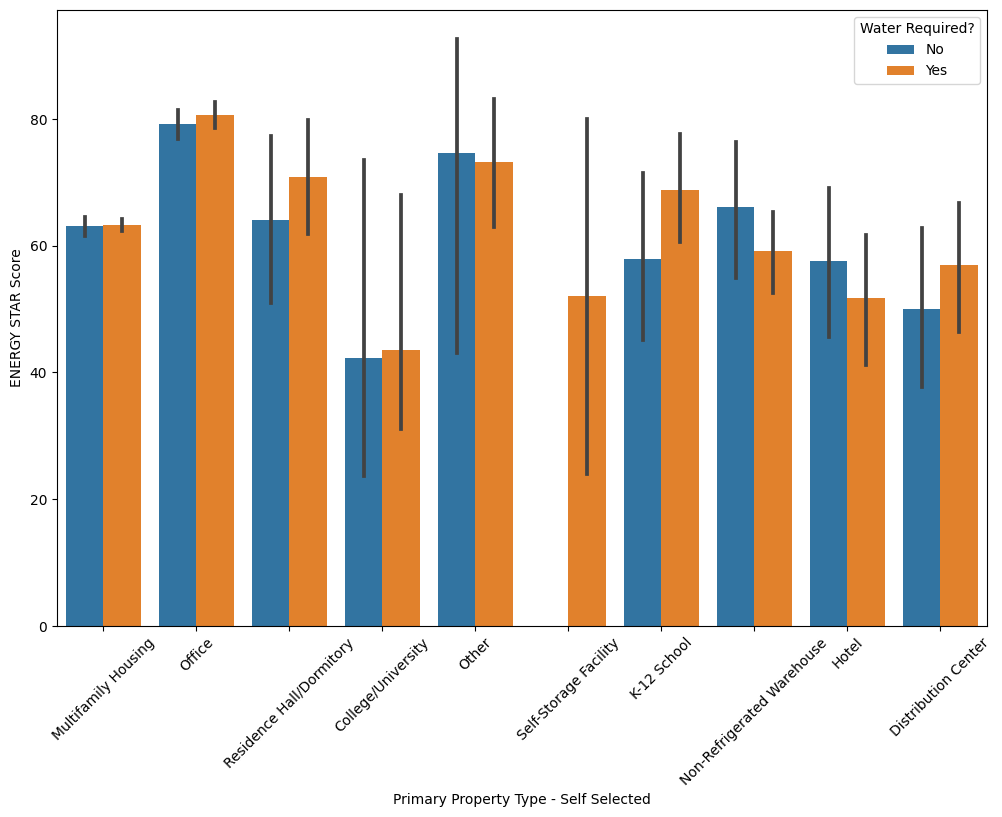

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(y=data['ENERGY STAR Score'],x=df_most_types['Primary Property Type - Self Selected'],hue=data['Water Required?'])
plt.xticks(rotation=45)
plt.show()

In [42]:
data['Year Built'].describe()

count    6292.000000
mean     1946.043388
std        29.548785
min      1870.000000
25%      1926.000000
50%      1938.000000
75%      1962.000000
max      2016.000000
Name: Year Built, dtype: float64

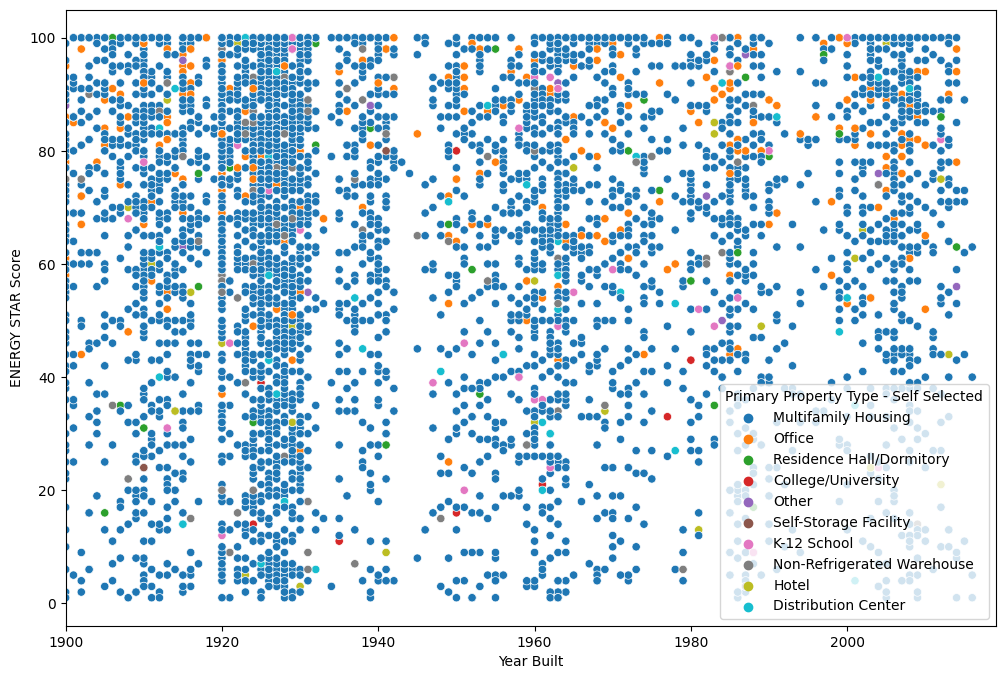

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=data['ENERGY STAR Score'],hue=df_most_types['Primary Property Type - Self Selected'],x=df['Year Built'])
plt.xlim([1900,2019])
plt.show()

In [ ]:
#year built probably not high corr with ESS

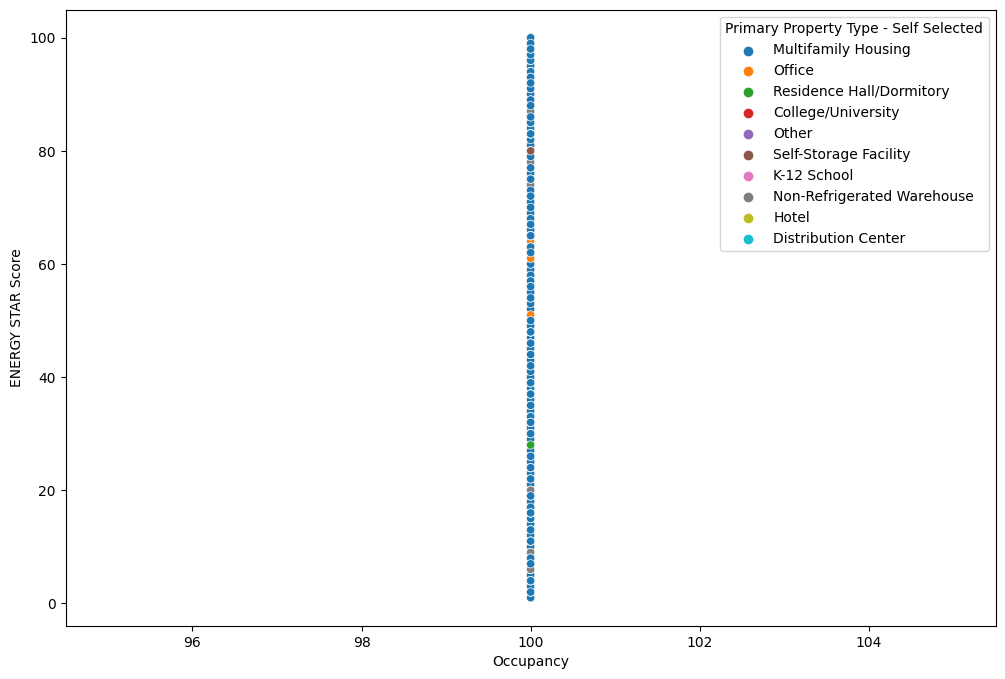

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=data['ENERGY STAR Score'],hue=df_most_types['Primary Property Type - Self Selected'],x=data['Occupancy'])
plt.show()

In [ ]:
#occupancy not high corr with ESS

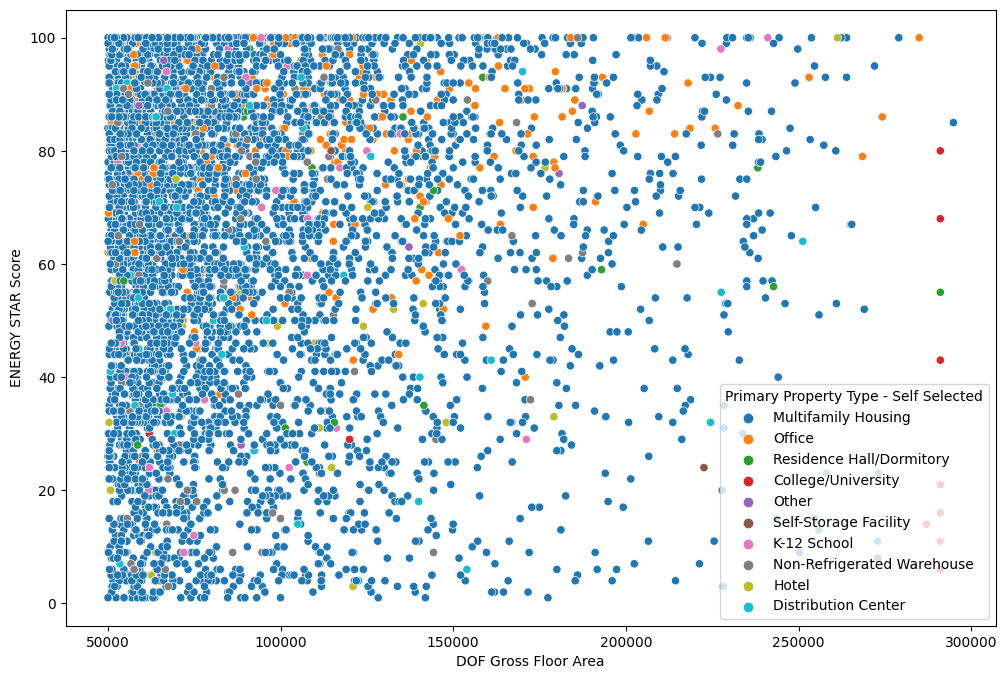

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=data['ENERGY STAR Score'],hue=df_most_types['Primary Property Type - Self Selected'],x=data['DOF Gross Floor Area'])
plt.show()

In [ ]:
#DOF gross Floor area probably not high corr with ESS

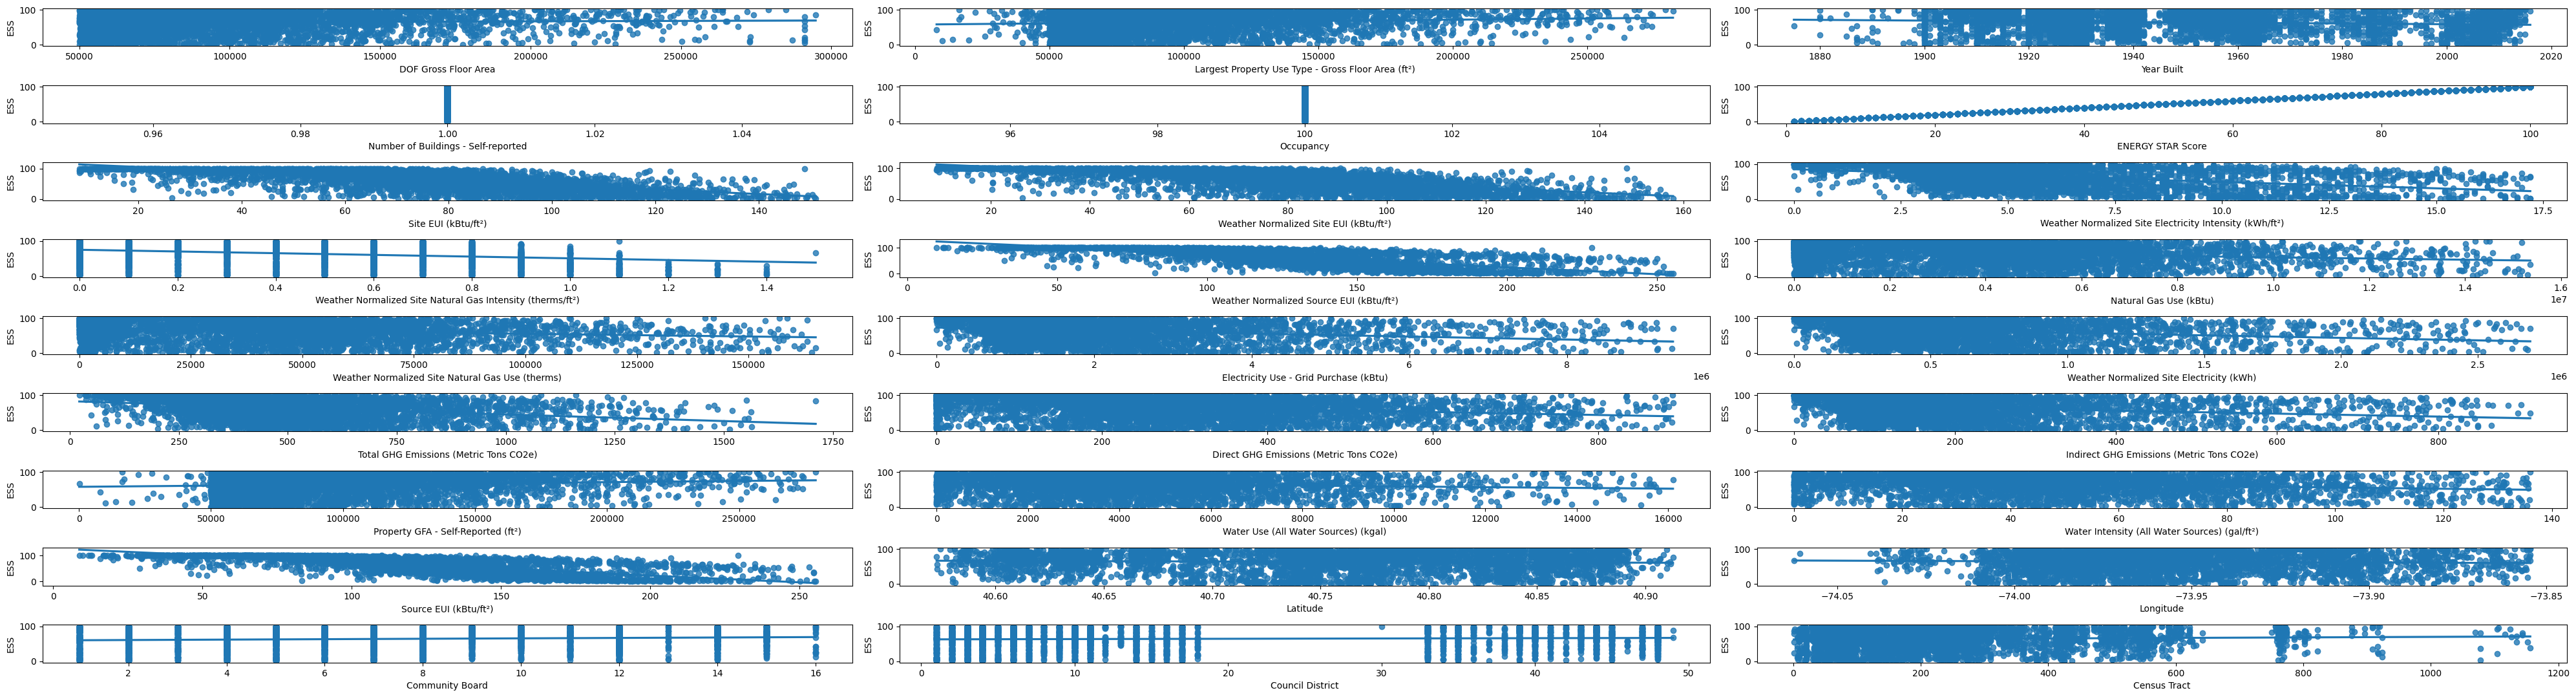

In [46]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(40,45))

for col in num_cols:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.regplot(x=data[col],y=data['ENERGY STAR Score'])
  plt.ylabel('ESS')
  c=c+1

plt.tight_layout()
plt.show()

In [47]:
#+ grande utilisation d'une source d'énergie entraine baisse de l'ESS
#+ grande volume de Gas Emission entraine baisse de l'ESS
# weather normalized site Gas use and Intensity
# weather normalized site Electric use and Intensity
# weather normalized site / source EUI = Energy use intensity

In [48]:
data.describe()

DOF Gross Floor Area  \
count           6268.000000   
mean           95331.876516   
std            44649.962793   
min            50028.000000   
25%            62099.000000   
50%            79910.000000   
75%           114994.000000   
max           294821.000000   

       Largest Property Use Type - Gross Floor Area (ft²)   Year Built  \
count                                        6291.000000   6292.000000   
mean                                        94263.622095   1946.043388   
std                                         43442.699988     29.548785   
min                                          8000.000000   1870.000000   
25%                                         62625.000000   1926.000000   
50%                                         80000.000000   1938.000000   
75%                                        113891.000000   1962.000000   
max                                        281941.000000   2016.000000   

       Number of Buildings - Self-reported  Occupancy  ENERGY STAR Score  \
count                               6292.0     6292.0        5261.000000   
mean                                   1.0      100.0          64.421973   
std                                    0.0        0.0          27.241580   
min                                    1.0      100.0           1.000000   
25%                                    1.0      100.0          46.000000   
50%                                    1.0      100.0          70.000000   
75%                                    1.0      100.0          87.000000   
max                                    1.0      100.0         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count          6232.000000                             5515.000000   
mean             73.989265                               77.812947   
std              25.660435                               26.955478   
min               8.600000                                9.000000   
25%              60.175000                               63.100000   
50%              74.700000                               78.800000   
75%              89.525000                               94.500000   
max             151.000000                              157.900000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                        5904.000000         
mean                                            5.829590         
std                                             3.263483         
min                                             0.000000         
25%                                             3.600000         
50%                                             4.800000         
75%                                             7.200000         
max                                            17.200000         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
count                                        5416.000000            
mean                                            0.454838            
std                                             0.319306            
min                                             0.000000            
25%                                             0.100000            
50%                                             0.500000            
75%                                             0.700000            
max                                             1.500000            

       Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
count                               5515.000000            5.705000e+03   
mean                                 123.159347            3.960240e+06   
std                                   39.850901            3.182682e+06   
min                                    9.800000            0.000000e+00   
25%                                   99.100000            9.755530e+05   
50%                                  120.600000            3.825439e+06   
75

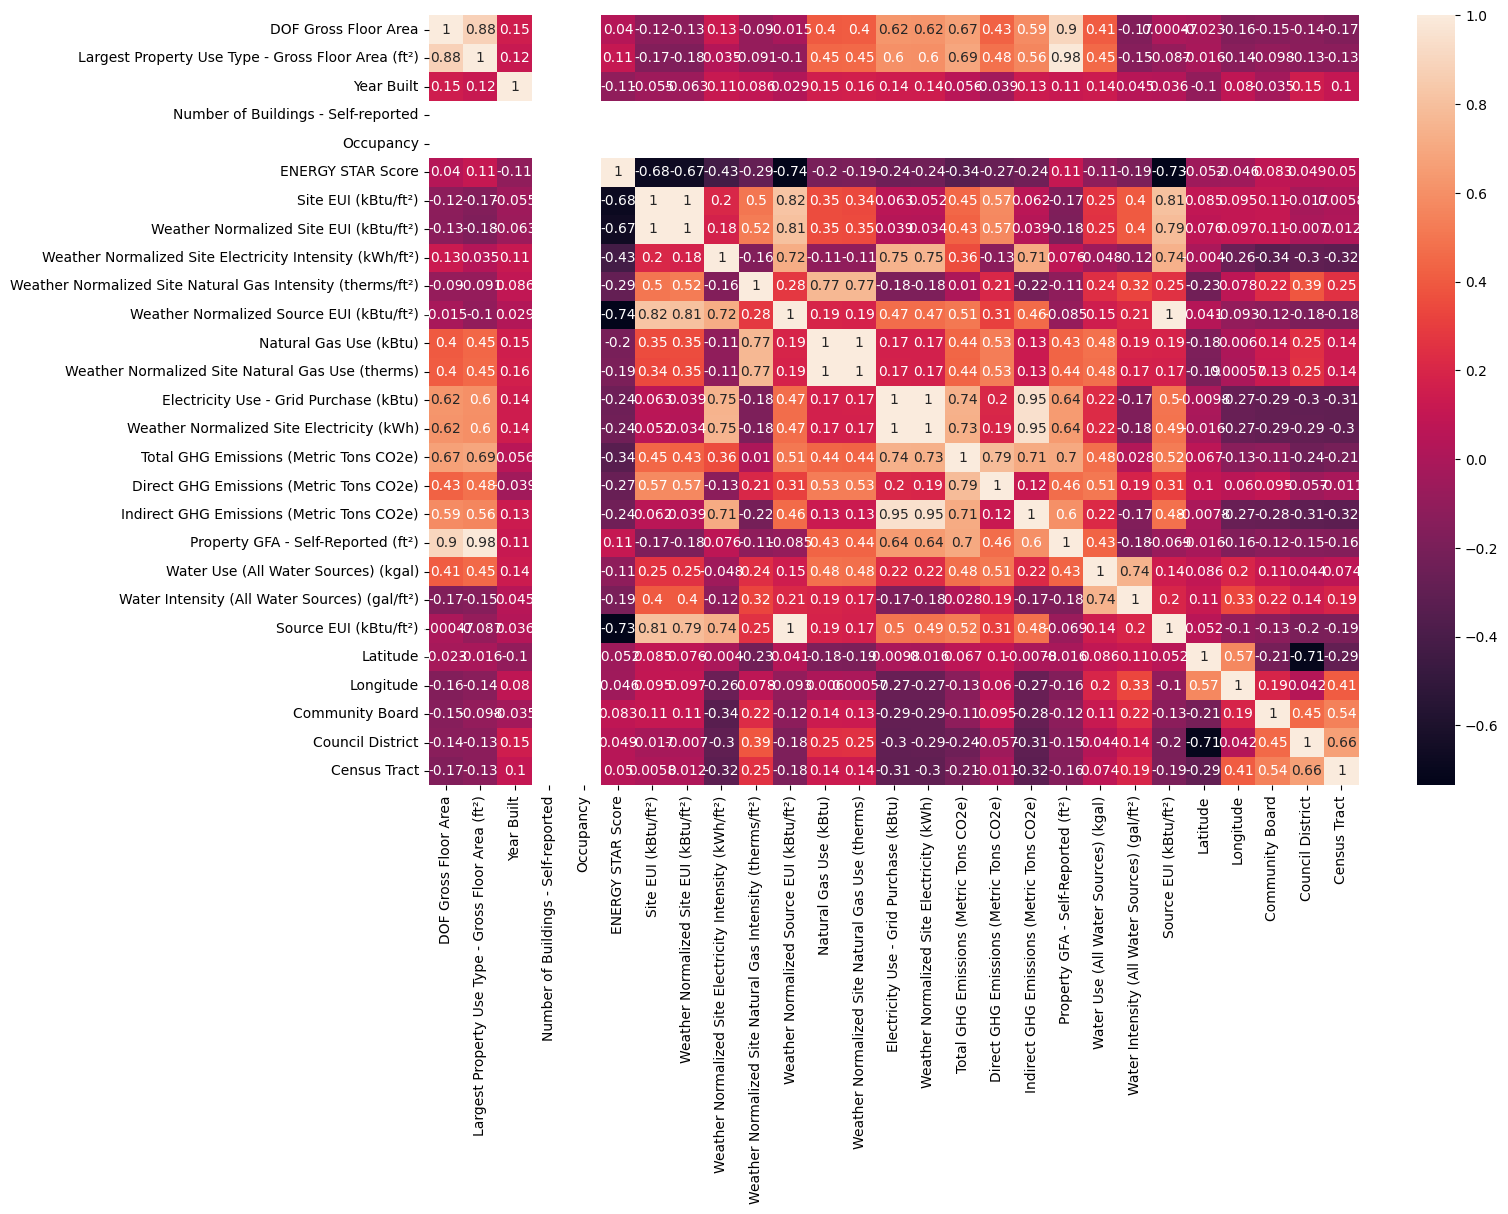

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [50]:
# a lot of high correlations between variables suspects multicolinearity
# high correlation between variable and its weather normalized version
# high correlation betwenn variable and its independent ones (ex: Total GHG Emission and Direct and Indirect GHG Emission)

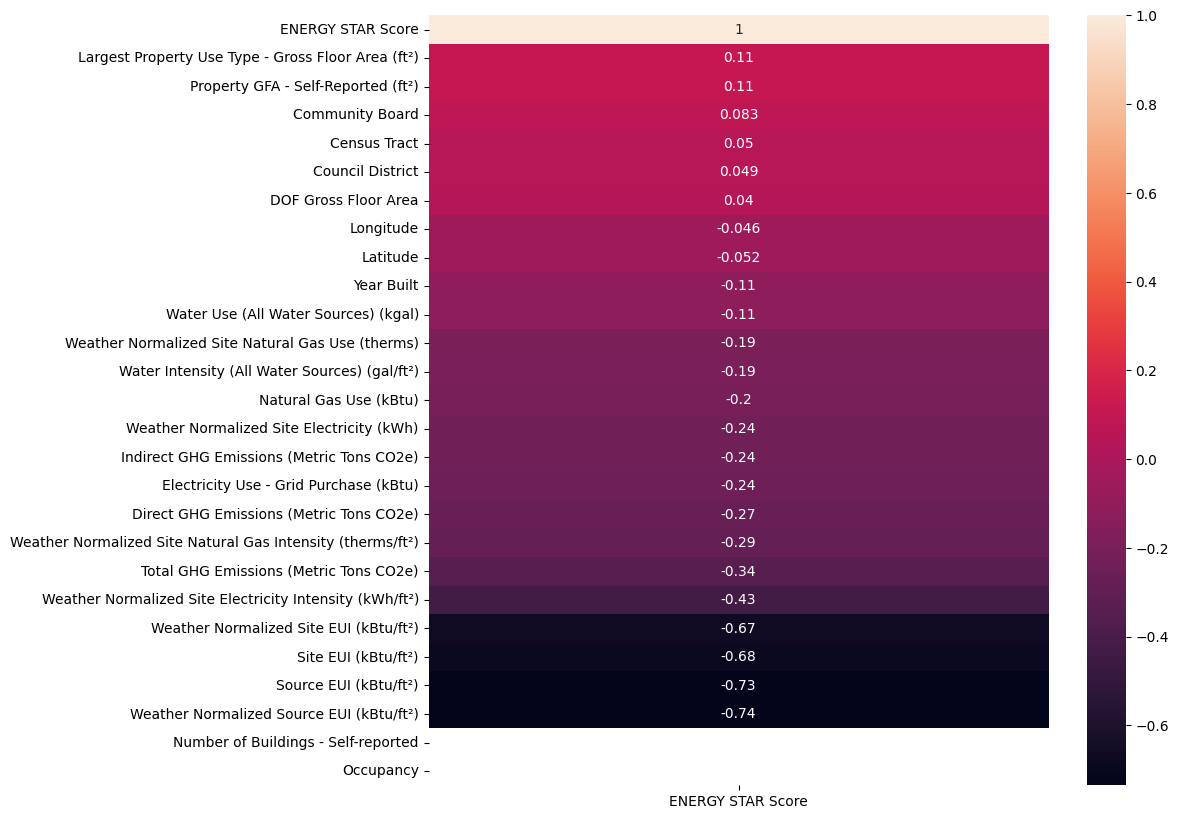

In [51]:
#confirms regplot ESS very negatively influenced by Weather Normalized Site and Source EUI
plt.figure(figsize=(10,10))
sns.heatmap(data.corr()[['ENERGY STAR Score']].sort_values(ascending=False,by='ENERGY STAR Score'),annot=True)
plt.show()

In [52]:
data.isnull().mean().sort_values(ascending=False)

Metered Areas  (Water)                                        0.389860
Water Intensity (All Water Sources) (gal/ft²)                 0.310871
Water Use (All Water Sources) (kgal)                          0.310871
Census Tract                                                  0.223617
Council District                                              0.223617
Community Board                                               0.223617
Longitude                                                     0.223617
Latitude                                                      0.223617
ENERGY STAR Score                                             0.163859
Weather Normalized Site Natural Gas Use (therms)              0.139224
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0.139224
Weather Normalized Source EUI (kBtu/ft²)                      0.123490
Weather Normalized Site EUI (kBtu/ft²)                        0.123490
Natural Gas Use (kBtu)                                        0.093293
Weathe

In [53]:
#handle Nan
num_cols_data = data.select_dtypes('number')
for col in num_cols_data:
  data[col] = data[col].fillna(df[col].median())

In [54]:
data.dropna(inplace=True)

In [55]:
data.isnull().mean().sort_values(ascending=False)

Parent Property Name                                          0.0
Water Intensity (All Water Sources) (gal/ft²)                 0.0
Electricity Use - Grid Purchase (kBtu)                        0.0
Weather Normalized Site Electricity (kWh)                     0.0
Total GHG Emissions (Metric Tons CO2e)                        0.0
Direct GHG Emissions (Metric Tons CO2e)                       0.0
Indirect GHG Emissions (Metric Tons CO2e)                     0.0
Property GFA - Self-Reported (ft²)                            0.0
Water Use (All Water Sources) (kgal)                          0.0
Source EUI (kBtu/ft²)                                         0.0
Address 1 (self-reported)                                     0.0
Release Date                                                  0.0
Water Required?                                               0.0
DOF Benchmarking Submission Status                            0.0
Latitude                                                      0.0
Longitude 

In [56]:
data.drop(['Parent Property Name','Address 1 (self-reported)','Release Date'],axis=1,inplace=True)

In [57]:
#encode
cat_cols_data = data.select_dtypes('object')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols_data:
  data[col] = le.fit_transform(data[col])

In [58]:
data.head()

Borough  DOF Gross Floor Area  Primary Property Type - Self Selected  \
16        2               55056.0                                     22   
18        2               84442.0                                     11   
21        2              122500.0                                      2   
22        2              141811.0                                      2   
24        2              100628.0                                      2   

    List of All Property Use Types at Property  Largest Property Use Type  \
16                                         267                         22   
18                                         237                         10   
21                                          13                          2   
22                                          13                          2   
24                                          13                          2   

    Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
16                                            57903.0         1932   
18                                            52850.0         1970   
21                                            61310.0         1895   
22                                           168566.0         2001   
24                                           128679.0         1894   

    Number of Buildings - Self-reported  Occupancy  Metered Areas (Energy)  \
16                                    1        100                       2   
18                                    1        100                       2   
21                                    1        100                       0   
22                                    1        100                       2   
24                                    1        100                       2   

    Metered Areas  (Water)  ENERGY STAR Score  Site EUI (kBtu/ft²)  \
16                       3              100.0                 11.4   
18                       3               81.0                 85.6   
21                       3               65.0                 52.9   
22                       3               65.0                 10.1   
24                       3               65.0                 29.9   

    Weather Normalized Site EUI (kBtu/ft²)  \
16                                    11.4   
18                                    89.8   
21                                    52.9   
22                                    10.1   
24                                    29.9   

    Weather Normalized Site Electricity Intensity (kWh/ft²)  \
16                                                0.0         
18                                                9.8         
21                                               15.5         
22                                                2.9         
24                                                8.7         

    Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
16                                                0.1            
18                                                0.0            
21                                                0.5            
22                                                0.0            
24                                                0.5            

    Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
16                                      11.9               657600.00   
18                                     161.7                49786.00   
21                                     166.2              4103962.15   
22                                      31.2                53900.00   
24                                      93.7              4103962.15   

    Weather Normalized Site Natural Gas Use (therms)  \
16                                           6576.00   
18                                            523.10   
21                                          44455.25   
22                                            539.00   
24     

In [59]:
data.skew().sort_values(ascending=False)

Largest Property Use Type                                      4.759829
Primary Property Type - Self Selected                          4.262693
Weather Normalized Site Electricity (kWh)                      2.010265
Electricity Use - Grid Purchase (kBtu)                         1.931994
Indirect GHG Emissions (Metric Tons CO2e)                      1.927956
Census Tract                                                   1.845189
DOF Gross Floor Area                                           1.511024
Property GFA - Self-Reported (ft²)                             1.454483
Largest Property Use Type - Gross Floor Area (ft²)             1.452128
Weather Normalized Site Electricity Intensity (kWh/ft²)        1.397960
Council District                                               1.316536
Total GHG Emissions (Metric Tons CO2e)                         1.202070
Water Use (All Water Sources) (kgal)                           1.003798
Natural Gas Use (kBtu)                                         0

In [60]:
skewed_cols_data = []

for col in data.columns:
  if data[col].skew() > 4 or data[col].skew() < -10 :
    skewed_cols_data.append(col)

skewed_cols_data

['Largest Property Use Type',
 'Metered Areas (Energy)',
 'Metered Areas  (Water)']

In [61]:
for col in skewed_cols_data:
  data[col] = np.log1p(data[col])

In [62]:
data.skew().sort_values(ascending=False)

Primary Property Type - Self Selected                          4.262693
Weather Normalized Site Electricity (kWh)                      2.010265
Electricity Use - Grid Purchase (kBtu)                         1.931994
Indirect GHG Emissions (Metric Tons CO2e)                      1.927956
Census Tract                                                   1.845189
DOF Gross Floor Area                                           1.511024
Property GFA - Self-Reported (ft²)                             1.454483
Largest Property Use Type - Gross Floor Area (ft²)             1.452128
Weather Normalized Site Electricity Intensity (kWh/ft²)        1.397960
Council District                                               1.316536
Largest Property Use Type                                      1.208956
Total GHG Emissions (Metric Tons CO2e)                         1.202070
Water Use (All Water Sources) (kgal)                           1.003798
Natural Gas Use (kBtu)                                         0

In [ ]:
#not better

In [63]:
data.head()

Borough  DOF Gross Floor Area  Primary Property Type - Self Selected  \
16        2               55056.0                                     22   
18        2               84442.0                                     11   
21        2              122500.0                                      2   
22        2              141811.0                                      2   
24        2              100628.0                                      2   

    List of All Property Use Types at Property  Largest Property Use Type  \
16                                         267                   3.135494   
18                                         237                   2.397895   
21                                          13                   1.098612   
22                                          13                   1.098612   
24                                          13                   1.098612   

    Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
16                                            57903.0         1932   
18                                            52850.0         1970   
21                                            61310.0         1895   
22                                           168566.0         2001   
24                                           128679.0         1894   

    Number of Buildings - Self-reported  Occupancy  Metered Areas (Energy)  \
16                                    1        100                1.098612   
18                                    1        100                1.098612   
21                                    1        100                0.000000   
22                                    1        100                1.098612   
24                                    1        100                1.098612   

    Metered Areas  (Water)  ENERGY STAR Score  Site EUI (kBtu/ft²)  \
16                1.386294              100.0                 11.4   
18                1.386294               81.0                 85.6   
21                1.386294               65.0                 52.9   
22                1.386294               65.0                 10.1   
24                1.386294               65.0                 29.9   

    Weather Normalized Site EUI (kBtu/ft²)  \
16                                    11.4   
18                                    89.8   
21                                    52.9   
22                                    10.1   
24                                    29.9   

    Weather Normalized Site Electricity Intensity (kWh/ft²)  \
16                                                0.0         
18                                                9.8         
21                                               15.5         
22                                                2.9         
24                                                8.7         

    Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
16                                                0.1            
18                                                0.0            
21                                                0.5            
22                                                0.0            
24                                                0.5            

    Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
16                                      11.9               657600.00   
18                                     161.7                49786.00   
21                                     166.2              4103962.15   
22                                      31.2                53900.00   
24                                      93.7              4103962.15   

    Weather Normalized Site Natural Gas Use (therms)  \
16                                           6576.00   
18                                            523.10   
21                                          44455.25   
22                                            539.00   
24     

In [65]:
data.isnull().sum()

Borough                                                       0
DOF Gross Floor Area                                          0
Primary Property Type - Self Selected                         0
List of All Property Use Types at Property                    0
Largest Property Use Type                                     0
Largest Property Use Type - Gross Floor Area (ft²)            0
Year Built                                                    0
Number of Buildings - Self-reported                           0
Occupancy                                                     0
Metered Areas (Energy)                                        0
Metered Areas  (Water)                                        0
ENERGY STAR Score                                             0
Site EUI (kBtu/ft²)                                           0
Weather Normalized Site EUI (kBtu/ft²)                        0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0
Weather Normalized Site Natural Gas Inte

In [66]:
data.dropna(inplace=True)

In [67]:
X = data.drop('ENERGY STAR Score',axis=1) 
y = data['ENERGY STAR Score']

from statsmodels.stats import diagnostic

import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
#predictions = model.predict(x_test) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:41:57   Log-Likelihood:                -16365.
No. Observations:                3818   AIC:                         3.279e+04
Df Residuals:                    3786   BIC:                         3.299e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [68]:
#pour les variables avec une p-value <0.05 on rejette H0: hypothèse de non significativité au seuil 5%
#pour les variables avec une p-value >0.05 on ne rejette pas H0: hypothèse de non significativité 5%
data_signi = data.drop(['Borough','Largest Property Use Type - Gross Floor Area (ft²)','Metered Areas (Energy)','Metered Areas  (Water)','Weather Normalized Site EUI (kBtu/ft²)','Weather Normalized Site Natural Gas Intensity (therms/ft²)','Weather Normalized Source EUI (kBtu/ft²)','Natural Gas Use (kBtu)','Weather Normalized Site Natural Gas Use (therms)','Electricity Use - Grid Purchase (kBtu)','Weather Normalized Site Electricity (kWh)','Total GHG Emissions (Metric Tons CO2e)','Direct GHG Emissions (Metric Tons CO2e)','Indirect GHG Emissions (Metric Tons CO2e)','Property GFA - Self-Reported (ft²)','Water Use (All Water Sources) (kgal)','Water Intensity (All Water Sources) (gal/ft²)','Source EUI (kBtu/ft²)','Water Required?','DOF Benchmarking Submission Status','Latitude','Census Tract'],axis=1)

In [69]:
X = data_signi.drop('ENERGY STAR Score',axis=1) 
y = data_signi['ENERGY STAR Score']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
#predictions = model.predict(x_test) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     330.1
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:41:57   Log-Likelihood:                -16396.
No. Observations:                3818   AIC:                         3.281e+04
Df Residuals:                    3807   BIC:                         3.288e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [70]:
# pour DOF Gross Floor Area p-value >0.05 on ne rejette pas H0: hypothèse de non significativité 5%
data_signi_2 = data_signi.drop('DOF Gross Floor Area',axis=1)

In [71]:
X = data_signi_2.drop('ENERGY STAR Score',axis=1) 
y = data_signi_2['ENERGY STAR Score']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
#predictions = model.predict(x_test) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     366.7
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:41:57   Log-Likelihood:                -16396.
No. Observations:                3818   AIC:                         3.281e+04
Df Residuals:                    3808   BIC:                         3.287e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [72]:
#R2 = 46% pouvoir explicatif tres moyen
#DW preseque égale à 2, assez proche pour considérer une abscence d'autocorrelation des erreurs
#Prob(JB) < 0.05 on rejette H0 hypothèse de distribution normale des erreus

In [85]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 362.3514981776715),
 ('p-value', 9.510470801183295e-72),
 ('f-value', 44.36647561980916),
 ('f p-value', 2.4425135443624113e-76)]

In [ ]:
# p-value < 0,05 on rejette H0: hypothese d'homoscedasticité

In [74]:
import statsmodels.api as sm


def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [75]:
vif_cal(input_data=data_signi_2, dependent_col='ENERGY STAR Score')

Var   Vif
2                           Largest Property Use Type  7.48
0               Primary Property Type - Self Selected  6.81
1          List of All Property Use Types at Property  1.77
9                                     Community Board  1.44
10                                   Council District  1.36
7   Weather Normalized Site Electricity Intensity ...  1.30
6                                 Site EUI (kBtu/ft²)  1.12
8                                           Longitude  1.12
3                                          Year Built  1.07
4                 Number of Buildings - Self-reported  0.00
5                                           Occupancy  0.00

In [76]:
#Largest Property Use Type and Primary Property Type - Self Selected  vif>5, signe de multicolinéarité
#use a model robust to it

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X = data_signi_2.drop('ENERGY STAR Score',axis=1)
y = data_signi_2['ENERGY STAR Score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred_guess = np.median(y_train)
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred_guess))
mae(y_test, y_pred_guess)

17.589877835951135

In [80]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

rr = Ridge()
knn = KNeighborsRegressor()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()

regressors = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf),('Ridge Regression', rr)]

In [81]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    '{:s} : {:.0f} %'.format(regressor_name, accuracy)
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))

K Nearest Neighbours : 48 %
Decision Tree : 39 %
Random Forest : 64 %


In [82]:
from sklearn.model_selection import cross_val_score
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    accuracy = accuracy.mean()
    print('{:s} : {:.3f}'.format(regressor_name, accuracy))

K Nearest Neighbours : -12.817
Decision Tree : -13.404
Random Forest : -10.742


In [82]:
#random forest meilleur modele car meilleur pouvoir explicatif et mae la plus faible : un écart d'environ 10 entre l'ESS predit par le modele et sa vrai valeure